#Radical Raccoons
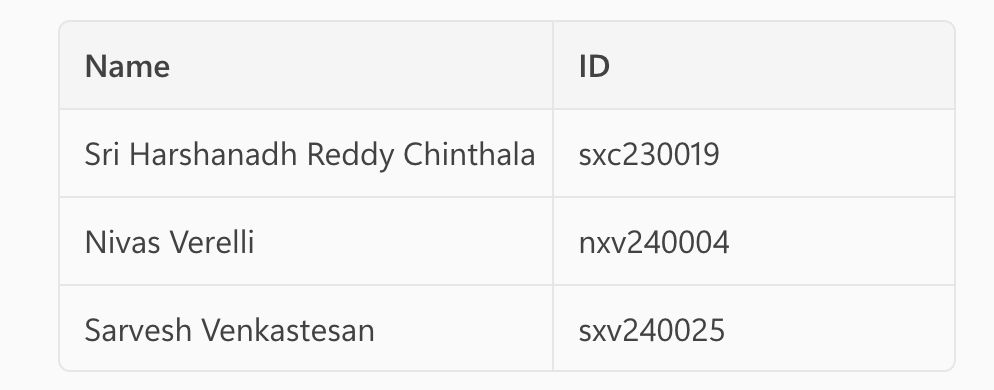

#Exercise 1: Identify Temporal Patterns

**Sample Data Generation:**

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=730, freq='D')

# Trend: Growing website traffic
trend = np.linspace(1000, 2000, 730)

# Weekly seasonality: Higher on weekdays
weekly = 200 * np.sin(2 * np.pi * np.arange(730) / 7)

# Annual seasonality: Higher in Q4
annual = 150 * np.sin(2 * np.pi * np.arange(730) / 365 - np.pi/2)

# Noise
noise = np.random.normal(0, 50, 730)

# Combine
visits = trend + weekly + annual + noise

df = pd.DataFrame({'Date': dates, 'Visits': visits})
df.to_csv('website_traffic.csv', index=False)

In [ ]:
df.head()

Date       Visits
0 2023-01-01   874.835708
1 2023-01-02  1000.847048
2 2023-01-03  1080.202383
3 2023-01-04  1017.243445
4 2023-01-05   757.358006

In [ ]:
df.describe()

Date       Visits
count                  730   730.000000
mean   2023-12-31 12:00:00  1499.512507
min    2023-01-01 00:00:00   618.414170
25%    2023-07-02 06:00:00  1242.285111
50%    2023-12-31 12:00:00  1510.444921
75%    2024-06-30 18:00:00  1758.476987
max    2024-12-30 00:00:00  2231.098110
std                    NaN   341.374502

#Load and visualize the data

**Create a line plot of daily visits**


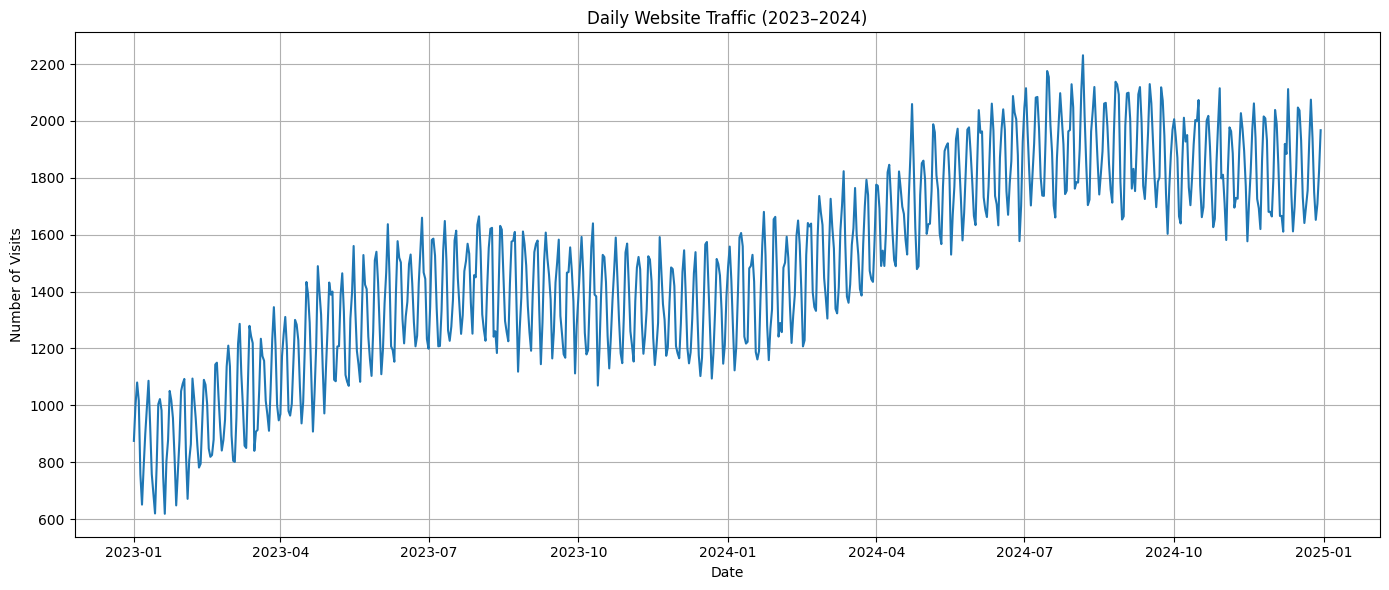

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# If not already done — ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date (good practice for time series)
df = df.sort_values('Date')

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Visits'])

plt.title('Daily Website Traffic (2023–2024)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)

plt.tight_layout()
plt.show()

**Add a 30-day moving average to reveal the trend**


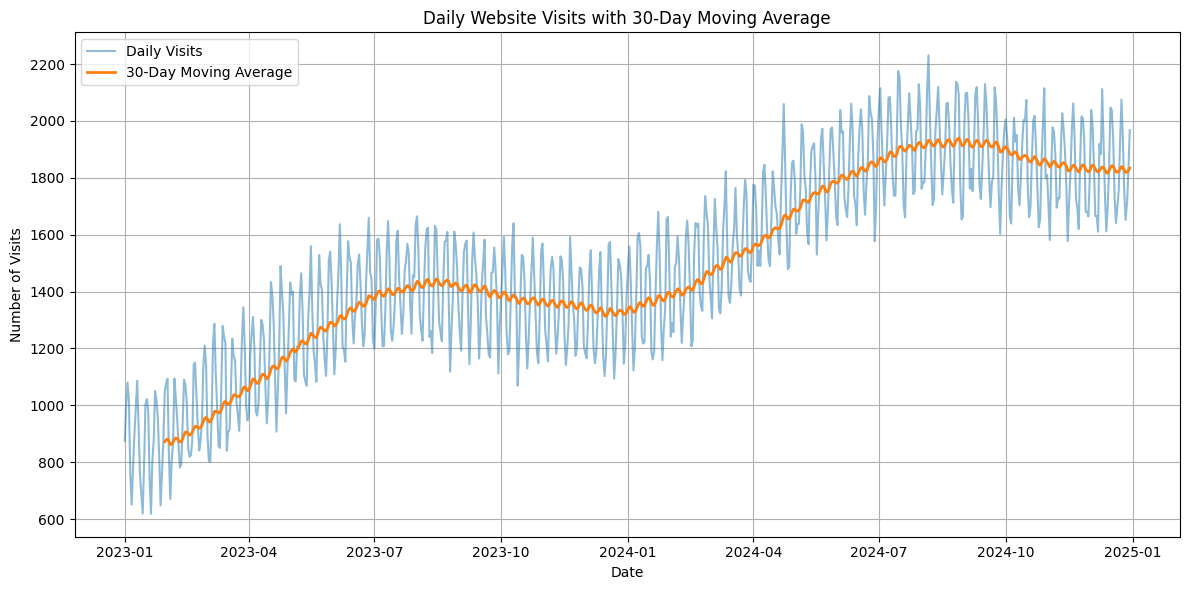

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date column is datetime and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Create 30-day moving average
df['MA_30'] = df['Visits'].rolling(window=30).mean()

# Plot original data + moving average
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Visits'], label='Daily Visits', alpha=0.5)
plt.plot(df['Date'], df['MA_30'], label='30-Day Moving Average', linewidth=2)

plt.title('Daily Website Visits with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Annotate any obvious anomalies or events**

In [ ]:
import pandas as pd
import numpy as np

# Calculate mean and standard deviation
average_visits = df['Visits'].mean()
std_dev = df['Visits'].std()

print(f"Average Visits: {average_visits:.2f}")
print(f"Standard Deviation: {std_dev:.2f}\n")

# Z-score calculation
df['Z_Score'] = (df['Visits'] - average_visits) / std_dev

# Threshold for anomaly detection
threshold = 2
df['Is_Anomaly'] = abs(df['Z_Score']) > threshold

# Display only anomalies
anomalies = df[df['Is_Anomaly']]

print("Anomalies Detected:\n")
print(anomalies[['Date', 'Visits', 'Z_Score']])

# Count anomalies
print(f"\nTotal number of anomalies: {anomalies.shape[0]}")

Average Visits: 1499.51
Standard Deviation: 341.37

Anomalies Detected:

          Date       Visits   Z_Score
4   2023-01-05   757.358006 -2.174019
5   2023-01-06   650.721554 -2.486392
6   2023-01-07   781.624174 -2.102935
11  2023-01-12   757.707087 -2.172996
12  2023-01-13   686.762424 -2.380817
13  2023-01-14   619.542659 -2.577726
14  2023-01-15   787.293490 -2.086328
18  2023-01-19   749.656770 -2.196578
19  2023-01-20   618.414170 -2.581031
20  2023-01-21   803.153387 -2.039869
25  2023-01-26   816.740289 -2.000068
26  2023-01-27   647.904781 -2.494644
27  2023-01-28   765.367852 -2.150555
33  2023-02-03   670.955130 -2.427121
34  2023-02-04   806.366815 -2.030455
40  2023-02-10   780.983943 -2.104810
41  2023-02-11   794.277905 -2.065868
61  2023-03-03   804.780744 -2.035102
62  2023-03-04   800.988805 -2.046209
583 2024-08-06  2231.098110  2.143059

Total number of anomalies: 20


For above I have used z score Statistical Techniques to find the anomalies and took a threshold of +-2 for higher sensitivity   



#Perform STL decomposition

**Use statsmodels.tsa.seasonal.STL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Convert Date column only if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

# STL decomposition
stl = STL(df['Visits'], period=7)
result = stl.fit()



**Extract trend, seasonal, and residual components**

In [ ]:
# Extract components
df['Trend'] = result.trend
df['Seasonal'] = result.seasonal
df['Residual'] = result.resid

# Display first few rows
print(df[['Visits', 'Trend', 'Seasonal', 'Residual']])


                 Visits        Trend    Seasonal   Residual
Date                                                       
2023-01-01   874.835708   879.105023    2.971492  -7.240807
2023-01-02  1000.847048   879.232377  122.833669  -1.218999
2023-01-03  1080.202383   879.126967  215.386362 -14.310946
2023-01-04  1017.243445   878.770830  114.330840  24.141774
2023-01-05   757.358006   878.180630 -114.547223  -6.275401
...                 ...          ...         ...        ...
2024-12-26  1749.092391  1841.020757  -86.482650  -5.445716
2024-12-27  1652.176342  1845.836801 -204.333310  10.672851
2024-12-28  1708.469282  1850.900216 -128.909862 -13.521071
2024-12-29  1821.729164  1856.174949  -52.836134  18.390349
2024-12-30  1967.473284  1861.638893  108.881976  -3.047586

[730 rows x 4 columns]


**Create a 4-panel plot showing all components**

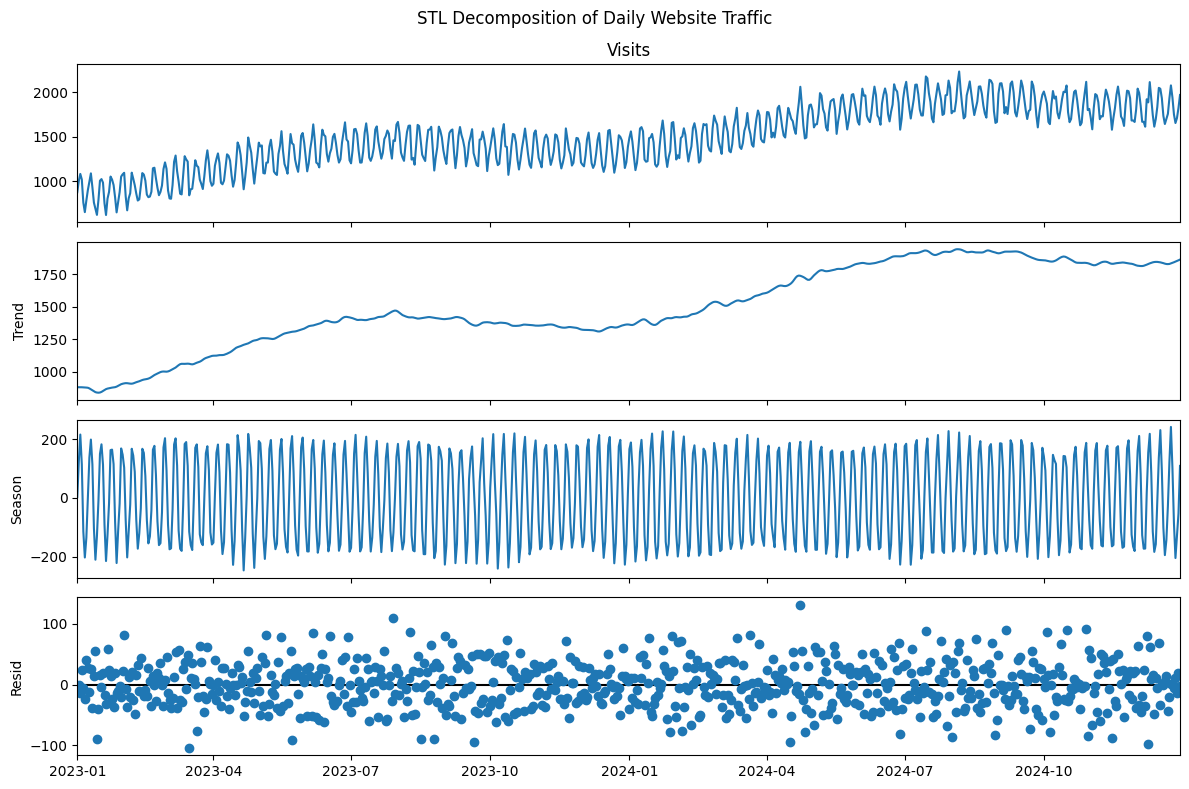

In [ ]:
# Plot decomposition
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('STL Decomposition of Daily Website Traffic')
plt.tight_layout()
plt.show()

#Analyze each component

**Trend: Calculate the overall growth rate**

In [ ]:
# Assuming df already contains 'Trend' column from STL

# Remove NaNs (trend often has NaNs at edges)
trend_clean = df['Trend'].dropna()

# First and last values
start_trend = trend_clean.iloc[0]
end_trend = trend_clean.iloc[-1]

# Growth calculations
absolute_growth = end_trend - start_trend
percent_growth = (absolute_growth / start_trend) * 100

print(f"Starting Trend Value: {start_trend:.2f}")
print(f"Ending Trend Value: {end_trend:.2f}")
print(f"Absolute Growth: {absolute_growth:.2f}")
print(f"Percentage Growth: {percent_growth:.2f}%")

Starting Trend Value: 879.11
Ending Trend Value: 1861.64
Absolute Growth: 982.53
Percentage Growth: 111.77%


In [ ]:
#annual Growth rate
years = 2
annual_growth = ((end_trend / start_trend) ** (1/years) - 1) * 100
print(f"Annual Growth Rate: {annual_growth:.2f}%")

Annual Growth Rate: 45.52%


**Seasonal: Identify the period (weekly, monthly, or both)**

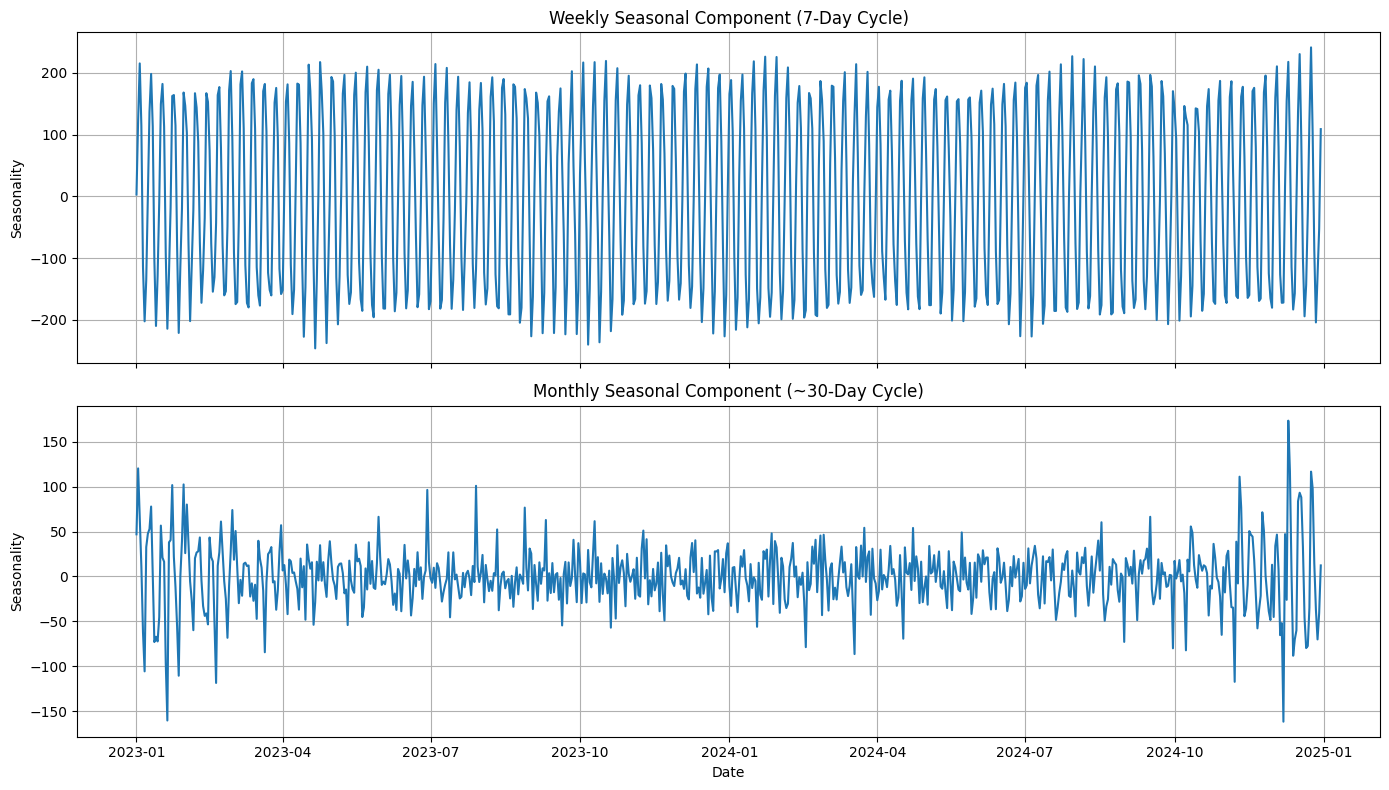

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# -------- Weekly Seasonality (7-day cycle) --------
stl_weekly = STL(df['Visits'], period=7)
result_weekly = stl_weekly.fit()
df['Weekly_Seasonal'] = result_weekly.seasonal

# -------- Monthly Seasonality (~30-day cycle) --------
stl_monthly = STL(df['Visits'], period=30)
result_monthly = stl_monthly.fit()
df['Monthly_Seasonal'] = result_monthly.seasonal


# -------- Plot Both Seasonal Components --------
fig, axes = plt.subplots(2, 1, figsize=(14,8), sharex=True)

axes[0].plot(df.index, df['Weekly_Seasonal'])
axes[0].set_title('Weekly Seasonal Component (7-Day Cycle)')
axes[0].set_ylabel('Seasonality')
axes[0].grid(True)

axes[1].plot(df.index, df['Monthly_Seasonal'])
axes[1].set_title('Monthly Seasonal Component (~30-Day Cycle)')
axes[1].set_ylabel('Seasonality')
axes[1].set_xlabel('Date')
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Residual: Check if residuals are random (use ACF plot)**

<Figure size 1000x500 with 0 Axes>

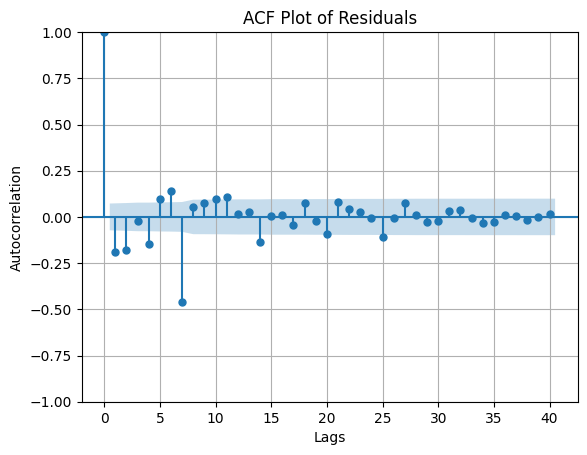

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Remove NaNs from residuals
residuals = df['Residual'].dropna()

# Plot ACF
plt.figure(figsize=(10,5))
plot_acf(residuals, lags=40)

plt.title('ACF Plot of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.show()

Mostly yes, the residuals appear largely random, but not perfectly. As Most autocorrelation spikes fall inside the blue confidence band.This means no strong remaining pattern after removing trend and seasonality. No consistent repeating spikes across lags suggests the STL decomposition captured the main seasonal structure. However There is one noticeable spike around lag ≈ 7 (negative correlation). This suggests a small leftover weekly effect or noise.

#Calculate component strengths

**Trend strength: 1 - var(resid) / var(trend + resid)**\
**Seasonal strength: 1 - var(resid) / var(seasonal + resid)**


In [ ]:
import numpy as np

# Remove NaNs before variance calculation
trend = df['Trend'].dropna()
seasonal = df['Seasonal'].dropna()
resid = df['Residual'].dropna()

# Align lengths
common_index = trend.index.intersection(seasonal.index).intersection(resid.index)

trend = trend.loc[common_index]
seasonal = seasonal.loc[common_index]
resid = resid.loc[common_index]

# Variances
var_resid = np.var(resid)
var_trend_resid = np.var(trend + resid)
var_seasonal_resid = np.var(seasonal + resid)

# Strength calculations
trend_strength = 1 - (var_resid / var_trend_resid)
seasonal_strength = 1 - (var_resid / var_seasonal_resid)

print(f"Trend Strength: {trend_strength:.3f}")
print(f"Seasonal Strength: {seasonal_strength:.3f}")

Trend Strength: 0.986
Seasonal Strength: 0.937


**Report which component dominates**

The trend strength is 0.986 and the seasonal strength is 0.937. Since the trend strength is higher than the seasonal strength, the trend component dominates the data. This means the website traffic is mainly increasing over time. Seasonal patterns like weekly changes are also present, but they are slightly weaker than the overall growth trend.


#Interpretation

From the website traffic data, we can see that visits are generally increasing over time, with about 112% growth in two years. This shows the website is becoming more popular. There is also a strong weekly pattern, meaning traffic changes regularly during different days of the week. The leftover values (residuals) are mostly random, which means trend and seasonality explain most of the data. Around 20 unusual points (anomalies) were found, mostly low visits at the beginning and one high spike later, which could be due to special events or sudden changes. Overall, the trend is the strongest factor, but seasonal patterns also affect the traffic.

#Exercise 2: Choose the Right Time Scale

**Generate and Load Data**

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=90*24, freq='H')

# Base level
base = 1000

# Hourly pattern (peaks at lunch and evening)
hour_of_day = dates.hour
hourly_pattern = 200 * np.sin((hour_of_day - 6) * np.pi / 12)

# Day of week pattern (lower on weekends)
day_of_week = dates.dayofweek
weekly_pattern = np.where(day_of_week < 5, 150, -100)

# Growth trend
trend = np.linspace(0, 200, len(dates))

# Noise
noise = np.random.normal(0, 50, len(dates))

# Combine
sales = base + hourly_pattern + weekly_pattern + trend + noise
sales = np.maximum(sales, 0)  # No negative sales

df = pd.DataFrame({'DateTime': dates, 'Sales': sales})
df.to_csv('hourly_sales.csv', index=False)

/tmp/ipython-input-1210843542.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range('2024-01-01', periods=90*24, freq='H')


In [ ]:
df.head()

DateTime        Sales
0 2024-01-01 00:00:00   974.835708
1 2024-01-01 01:00:00   949.994255
2 2024-01-01 02:00:00  1009.364617
3 2024-01-01 03:00:00  1085.008043
4 2024-01-01 04:00:00  1038.662873

In [ ]:
df.describe()

DateTime        Sales
count                           2160  2160.000000
mean   2024-02-14 23:29:59.999999744  1182.340478
min              2024-01-01 00:00:00   651.793107
25%              2024-01-23 11:45:00  1046.491507
50%              2024-02-14 23:30:00  1182.196935
75%              2024-03-08 11:15:00  1332.075414
max              2024-03-30 23:00:00  1681.360225
std                              NaN   195.315594

**How did we perform this month compared to last month?- Suggested scale: Daily aggregated to weeks or whole month - Visualization: Bar chart or line chart comparing two months - Requirement: Clear comparison, seasonally adjusted if needed**

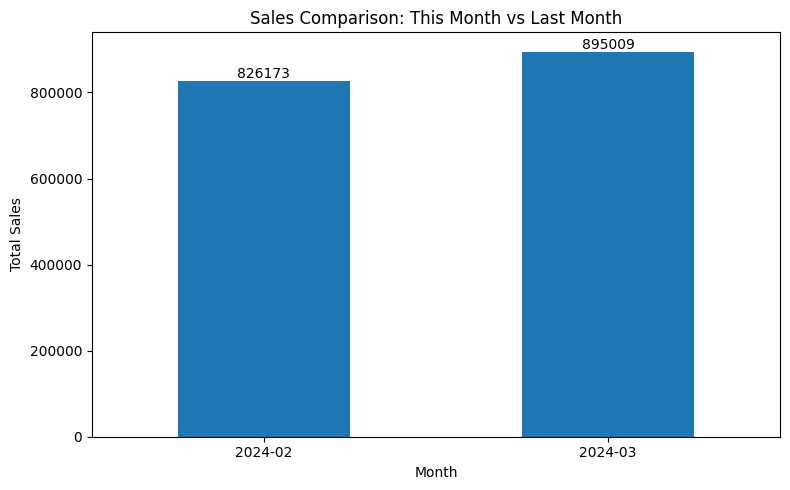

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (skip if already loaded)
# df = pd.read_csv('hourly_sales.csv')

# Convert datetime column
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract month
df['Month'] = df['DateTime'].dt.to_period('M')

# Aggregate total sales per month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Take last two months for comparison
comparison = monthly_sales.tail(2)

# Plot
plt.figure(figsize=(8,5))
comparison.plot(kind='bar')

plt.title('Sales Comparison: This Month vs Last Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Annotate values on bars
for i, v in enumerate(comparison):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretation:** From the graph, we can see that sales in March 2024 (895,009) are higher than sales in February 2024 (826,173). This shows that the company performed better this month compared to last month. The increase in sales may be due to higher demand, promotions, or business growth.

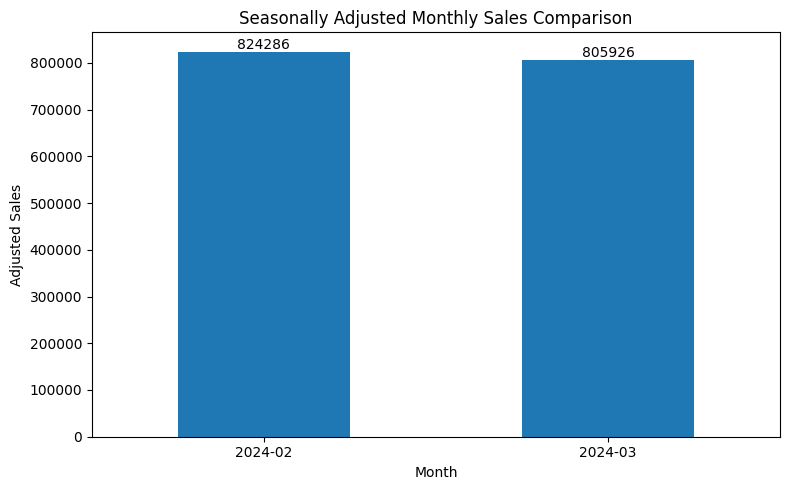

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Aggregate hourly → daily sales
daily_sales = df.resample('D', on='DateTime')['Sales'].sum()

# Seasonal adjustment using 7-day moving average
daily_adjusted = daily_sales.rolling(7, center=True).mean()

# Monthly totals from adjusted data
monthly_adjusted = daily_adjusted.groupby(
    daily_adjusted.index.to_period('M')
).sum()

# Last two months comparison
comparison = monthly_adjusted.tail(2)

# Plot
plt.figure(figsize=(8,5))
comparison.plot(kind='bar')

plt.title('Seasonally Adjusted Monthly Sales Comparison')
plt.xlabel('Month')
plt.ylabel('Adjusted Sales')
plt.xticks(rotation=0)

# Annotate values
for i, v in enumerate(comparison):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretation:** From the seasonally adjusted graph, we can see that sales in February (824,286) are slightly higher than sales in March (805,926). This means after removing weekly fluctuations, the company performed a little better in February compared to March. The difference is not very large, so overall sales performance stayed almost stable between the two months.

**Are there patterns in when customers shop during the day? - Suggested scale: Hourly, averaged across all days - Visualization: Line chart of average hourly traffic - Requirement: Show 24-hour cycle, highlight peak hours**



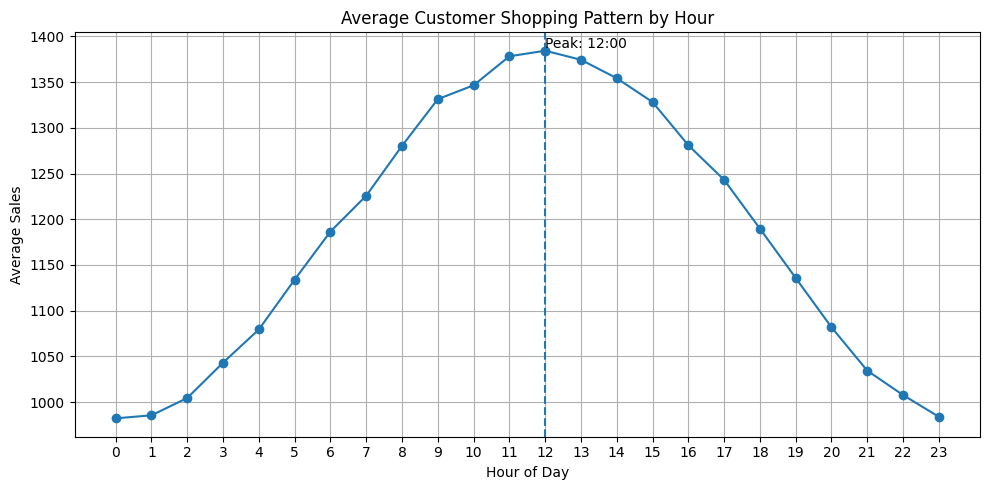

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract hour of day
df['Hour'] = df['DateTime'].dt.hour

# Average sales by hour across all days
hourly_avg = df.groupby('Hour')['Sales'].mean()

# Identify peak hour
peak_hour = hourly_avg.idxmax()
peak_value = hourly_avg.max()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')

# Highlight peak hour
plt.scatter(peak_hour, peak_value)
plt.axvline(peak_hour, linestyle='--')

plt.title('Average Customer Shopping Pattern by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales')
plt.xticks(range(24))
plt.grid(True)

# Annotate peak
plt.text(peak_hour, peak_value,
         f'Peak: {peak_hour}:00',
         ha='left', va='bottom')

plt.tight_layout()
plt.show()

**Interpretation:** From the graph, we can see that customers mostly shop around 12 PM (noon) during the day because sales are highest at that time. Sales gradually increase from morning to afternoon and then start decreasing in the evening and night. This shows that people prefer shopping during the middle of the day rather than late at night or very early morning.

**What's our growth trend over the quarter? - Suggested scale: Weekly aggregation - Visualization: Line chart with trend line - Requirement: Smooth enough to see trend, detailed enough to show variation**

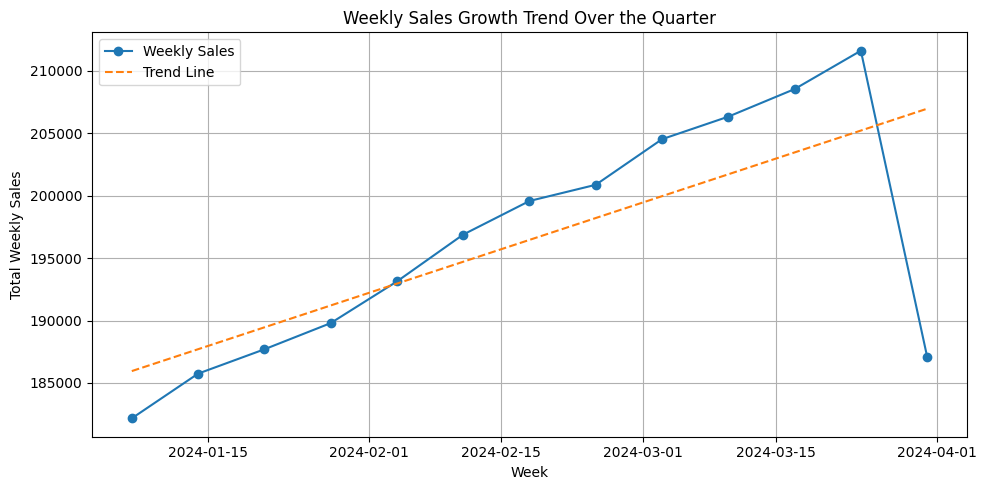

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Weekly aggregation (sum of sales per week)
weekly_sales = df.resample('W', on='DateTime')['Sales'].sum()

# Create numeric index for trend line
x = np.arange(len(weekly_sales))
y = weekly_sales.values

# Fit linear trend line
z = np.polyfit(x, y, 1)
trend_line = np.poly1d(z)

# Plot weekly sales
plt.figure(figsize=(10,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', label='Weekly Sales')

# Plot trend line
plt.plot(weekly_sales.index, trend_line(x), linestyle='--', label='Trend Line')

plt.title('Weekly Sales Growth Trend Over the Quarter')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretation:** From the graph, we can see that the company’s sales increased over the quarter, which means the business performance improved from January to March. Weekly sales kept growing, showing that more customers were buying products. However, there is a drop in the last week, which might be because the week is incomplete, there were fewer promotional offers, or customer demand was lower. Overall, the upward trend shows that the business is growing steadily despite the small drop at the end.

**Do we see weekly patterns (weekday vs weekend)? - Suggested scale: Daily data, grouped by day of week - Visualization: Box plot or bar chart by day of week - Requirement: Show all 7 days, highlight differences**

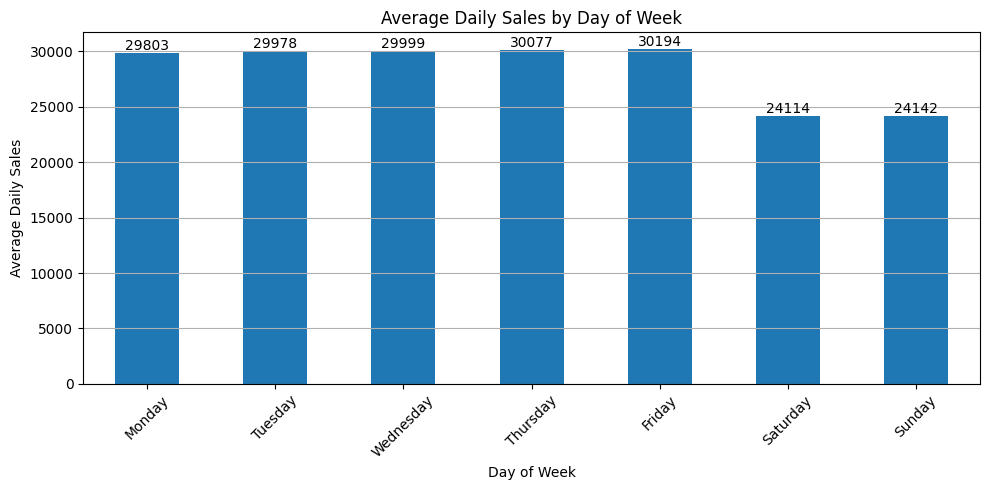

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Aggregate hourly → daily sales
daily_sales = df.resample('D', on='DateTime')['Sales'].sum().reset_index()

# Extract day name
daily_sales['DayOfWeek'] = daily_sales['DateTime'].dt.day_name()

# Order days properly
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
         'Friday', 'Saturday', 'Sunday']

# Average daily sales by day
avg_sales = daily_sales.groupby('DayOfWeek')['Sales'].mean().reindex(order)

# Plot bar chart
plt.figure(figsize=(10,5))
ax = avg_sales.plot(kind='bar')

plt.title('Average Daily Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add values on top of bars
for i, v in enumerate(avg_sales):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretation:** From the graph, we can see that sales are higher on weekdays, especially on Thursday and Friday, compared to weekends. Sales drop on Saturday and Sunday, which shows fewer customers shop during weekends. This may be because people are busy with personal activities on weekends, while weekday shopping may be due to regular needs or work-related purchases. Overall, the business performs better on weekdays than weekends.

# Exercise 3 - Time Series Decomposition

# Part A - Classical Decomposition

**Load the monthly sales data**

In [16]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=60, freq='ME')

# Growing trend
trend = np.linspace(10000, 15000, 60)

# Strong seasonality (holiday spike in Dec)
month = (np.arange(60) % 12) + 1
seasonal = 2000 * np.sin(2 * np.pi * month / 12 - np.pi/2)

# Add outliers (simulate promotions)
outliers = np.zeros(60)
outlier_months = [15, 32, 47]  # 3 promotional months
outliers[outlier_months] = 3000

# Noise
noise = np.random.normal(0, 300, 60)

# Combine
sales = trend + seasonal + outliers + noise

df = pd.DataFrame({
    'Month': dates,
    'Sales': sales
})
df.to_csv('monthly_retail_sales.csv', index=False)

In [18]:
df.head()

Month         Sales
0 2020-01-31   8416.963438
1 2020-02-29   9043.266472
2 2020-03-31  10363.798087
3 2020-04-30  11711.146245
4 2020-05-31  12000.787846

In [19]:
df.describe()

Month         Sales
count                   60     60.000000
mean   2022-07-16 02:00:00  12603.603595
min    2020-01-31 00:00:00   8416.963438
25%    2021-04-22 12:00:00  11041.922665
50%    2022-07-15 12:00:00  12610.618193
75%    2023-10-07 18:00:00  14341.920774
max    2024-12-31 00:00:00  16675.028310
std                    NaN   2152.094775

**Apply seasonal_decompose with model='additive' and period=12**

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_indexed = df.set_index('Month')
decomp = seasonal_decompose(df_indexed['Sales'], model='additive', period=12)

**Create the standard 4-panel decomposition plot**

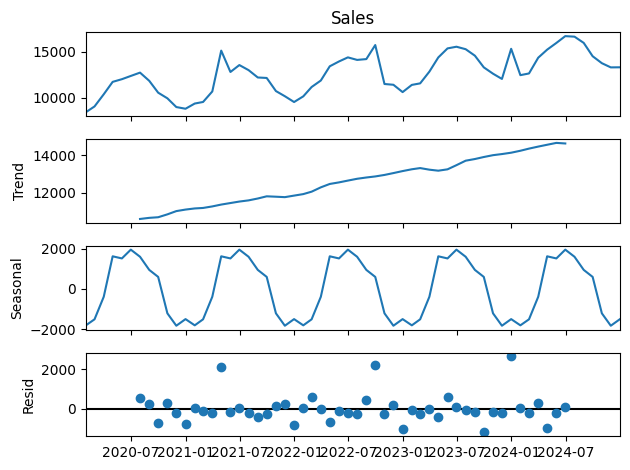

In [22]:
import matplotlib.pyplot as plt

decomp.plot()
plt.show()

**Identify the seasonal pattern (months which are high/low)**

In [23]:
seasonal_month = decomp.seasonal.groupby(decomp.seasonal.index.month).mean()

high_month = seasonal_month.idxmax()
low_month  = seasonal_month.idxmin()

print("Highest seasonal month:", high_month)
print("Lowest seasonal month:", low_month)

Highest seasonal month: 6
Lowest seasonal month: 11


Retail sales are rising consistently throughout the course of the five years, as indicated by the time series' obvious upward trend. The seasonal component repeats every 12 months, confirming the data's significant annual seasonality. The seasonal effect is greatest in month six (June) and lowest in month eleven (November). The residuals are comparatively small and dispersed randomly around zero, indicating that the trend and seasonal components account for the majority of the data volatility. Essentially the additive model is suitable for this dataset because to the steady rise and constant seasonal trend.

# Part B - STL Decomposition

**Apply STL with robust=True**

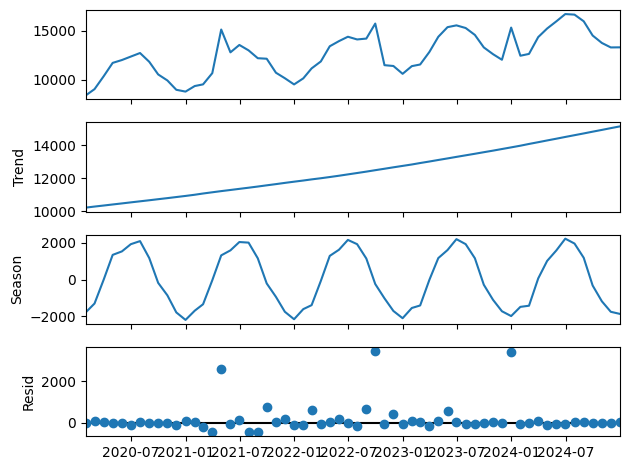

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import matplotlib.pyplot as plt

# Load your dataset (single column of Sales)
df = pd.read_csv("monthly_retail_sales.csv")
sales = df.iloc[:, 1].astype(float)

# Recreate monthly index (5 years = 60 months)
dates = pd.date_range("2020-01-31", periods=len(sales), freq="ME")
ts = pd.Series(sales.values, index=dates)

# STL with robust fitting
stl = STL(ts, period=12, robust=True).fit()

# STL 4-panel plot
stl.plot()
plt.show()

**Compare STL trend to Classical trend**

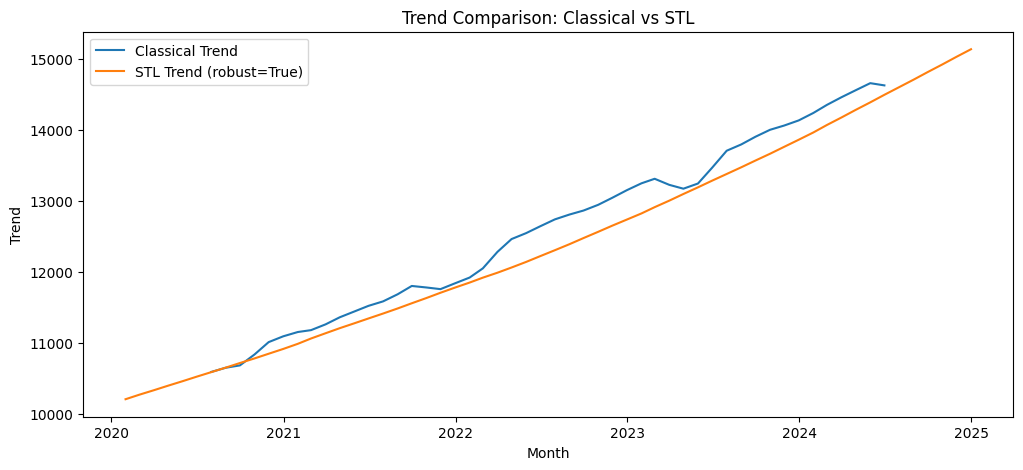

In [25]:
# Classical decomposition
classical = seasonal_decompose(ts, model="additive", period=12)

plt.figure(figsize=(12, 5))
plt.plot(classical.trend, label="Classical Trend")
plt.plot(stl.trend, label="STL Trend (robust=True)")
plt.title("Trend Comparison: Classical vs STL")
plt.xlabel("Month")
plt.ylabel("Trend")
plt.legend()
plt.show()

The STL trend is smoother and more straight, while the Classical trend has small ups and downs in between. Both show that sales are increasing over time, but STL gives a cleaner and more stable view of the overall growth.

**Which method handles outliers better?**

STL (with robust=True) handles outliers better because it down-weights extreme values and produces a more stable trend.

**Calculate trend and seasonal strengths**

In [26]:
def component_strength(trend, seasonal, resid):
    r = resid.dropna()
    t = trend.reindex(r.index)
    s = seasonal.reindex(r.index)

    trend_strength = 1 - (r.var() / (t.add(r)).var())
    seasonal_strength = 1 - (r.var() / (s.add(r)).var())

    return max(0, trend_strength), max(0, seasonal_strength)

# Strengths for Classical
c_trend_str, c_seas_str = component_strength(classical.trend, classical.seasonal, classical.resid)

# Strengths for STL
s_trend_str, s_seas_str = component_strength(stl.trend, stl.seasonal, stl.resid)

print("Classical strengths:")
print("  Trend strength   :", round(c_trend_str, 3))
print("  Seasonal strength:", round(c_seas_str, 3))

print("\nSTL (robust=True) strengths:")
print("  Trend strength   :", round(s_trend_str, 3))
print("  Seasonal strength:", round(s_seas_str, 3))

Classical strengths:
  Trend strength   : 0.734
  Seasonal strength: 0.802

STL (robust=True) strengths:
  Trend strength   : 0.807
  Seasonal strength: 0.797


The STL decomposition also confirms a steady upward trend in retail sales over time. When comparing the trends, the STL trend appears smoother and more consistent than the classical trend. The classical method shows slight bends in certain periods, meaning it is a bit more influenced by local fluctuations. STL with robust=True handles unusual spikes better because it reduces the impact of extreme values, keeping the overall pattern stable.Both methods confirm strong trend and seasonality, but STL provides a cleaner and more reliable estimate of the underlying growth.

# Part C - Seasonal Adjustment

**Create seasonally adjusted series (observed - seasonal) and Plot original vs seasonally adjusted**

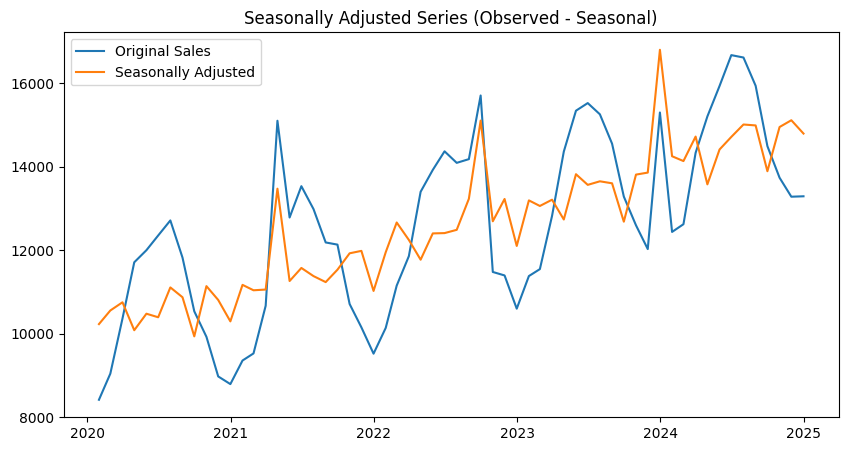

                   Sales  Seasonally_Adjusted
Month                                        
2020-01-31   8416.963438         10230.065917
2020-02-29   9043.266472         10556.251696
2020-03-31  10363.798087         10752.760797
2020-04-30  11711.146245         10083.401499
2020-05-31  12000.787846         10479.097482


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ----------------------------
# Load Data
# ----------------------------
# If using CSV file:
# df = pd.read_csv("monthly_sales.csv")

# Ensure date format
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month')
df.set_index('Month', inplace=True)

# ----------------------------
# Classical Decomposition
# ----------------------------
decomposition = seasonal_decompose(
    df['Sales'],
    model='additive',
    period=12   # Monthly data with yearly seasonality
)

# ----------------------------
# Create Seasonally Adjusted Series
# ----------------------------
df['Seasonally_Adjusted'] = df['Sales'] - decomposition.seasonal

# ----------------------------
# Plot Original vs Adjusted
# ----------------------------
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original Sales')
plt.plot(df['Seasonally_Adjusted'], label='Seasonally Adjusted')
plt.title("Seasonally Adjusted Series (Observed - Seasonal)")
plt.legend()
plt.show()

# View first few values
print(df[['Sales','Seasonally_Adjusted']].head())

**Interpret: Is growth real or just seasonal?**

After removing the seasonal component, the seasonally adjusted series still shows a clear upward trend. This means the increase in sales is not just due to seasonal spikes, but reflects genuine long-term growth. Even without the yearly ups and downs, sales continue to rise steadily over time. Therefore, the growth observed in the original series is real and structural, not purely driven by seasonality.

# Part D - Residual Analysis

**Plot residuals from both methods**

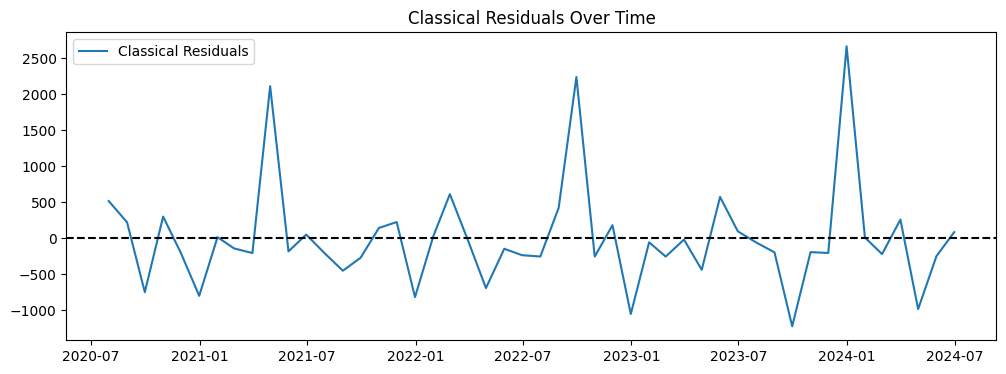

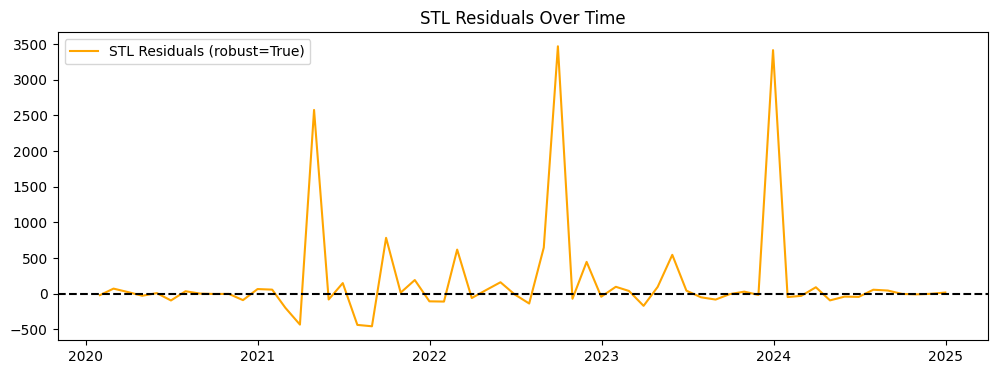

In [28]:
import matplotlib.pyplot as plt

# Classical residuals
plt.figure(figsize=(12,4))
plt.plot(classical.resid, label="Classical Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.title("Classical Residuals Over Time")
plt.legend()
plt.show()

# STL residuals
plt.figure(figsize=(12,4))
plt.plot(stl.resid, label="STL Residuals (robust=True)", color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("STL Residuals Over Time")
plt.legend()
plt.show()

**Check if residuals are random:**

**ACF plot of residuals**

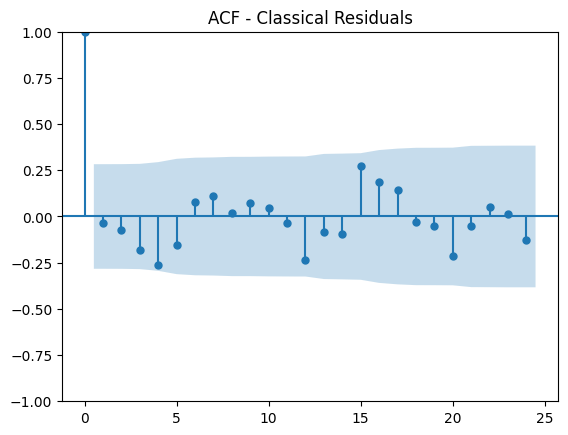

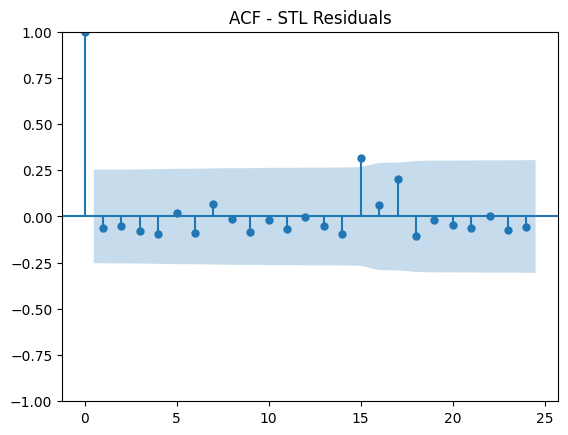

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

# Classical residual ACF
plot_acf(classical.resid.dropna(), lags=24)
plt.title("ACF - Classical Residuals")
plt.show()

# STL residual ACF
plot_acf(stl.resid.dropna(), lags=24)
plt.title("ACF - STL Residuals")
plt.show()

From the grapgh we can say that, residuals look mostly random because most ACF values are inside the confidence band.

**Histogram of residuals**

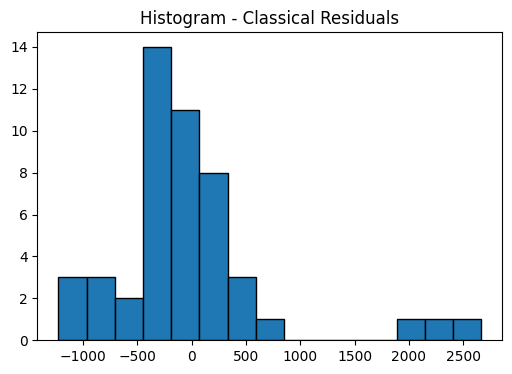

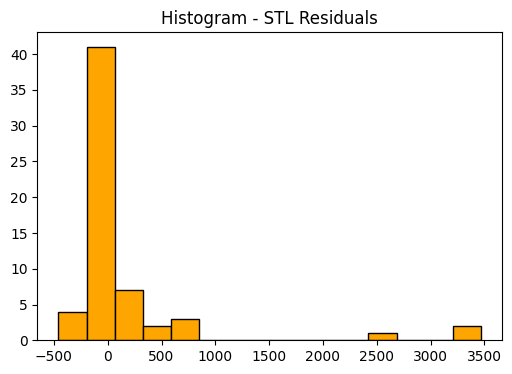

In [30]:
# Classical histogram
plt.figure(figsize=(6,4))
plt.hist(classical.resid.dropna(), bins=15, edgecolor='black')
plt.title("Histogram - Classical Residuals")
plt.show()

# STL histogram
plt.figure(figsize=(6,4))
plt.hist(stl.resid.dropna(), bins=15, edgecolor='black', color='orange')
plt.title("Histogram - STL Residuals")
plt.show()

**Identify any remaining patterns**\
**Interpretation:** The residual plots from both Classical and STL methods fluctuate around zero, which is a good sign.However, there are a few noticeable spikes in the residuals, indicating the presence of some extreme values that were not fully explained by the model.The ACF plots show that most autocorrelation values lie within the confidence bands, meaning there is no strong remaining pattern in the residuals.

The histograms show that residuals are mostly centered around zero, though slightly skewed due to a few large spikes.Overall, the residuals appear largely random, suggesting that both decomposition methods captured most of the trend and seasonal structure in the data. STL residuals appear slightly cleaner and more concentrated around zero compared to the classical method.

#Exercise 4: Forecasting Visualization

#Part A: Prepare Data


**Load daily sales data**


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=365, freq='D')

# Trend
trend = np.linspace(5000, 6500, 365)

# Weekly seasonality (weekend dip)
weekly = 500 * np.sin(2 * np.pi * np.arange(365) / 7)

# Annual seasonality (Q4 spike)
annual = 800 * np.sin(2 * np.pi * np.arange(365) / 365 - np.pi/2)

# Noise
noise = np.random.normal(0, 200, 365)

sales = trend + weekly + annual + noise

df = pd.DataFrame({
    'Date': dates,
    'Sales': sales
})
df.to_csv('daily_sales_forecast.csv', index=False)

In [ ]:
df.head()

Date        Sales
0 2023-01-01  4299.342831
1 2023-01-02  4567.502289
2 2023-01-03  4825.717501
3 2023-01-04  4734.977025
4 2023-01-05  3954.606728

In [ ]:
df.describe()

Date        Sales
count                  365   365.000000
mean   2023-07-02 00:00:00  5751.989280
min    2023-01-01 00:00:00  3499.948013
25%    2023-04-02 00:00:00  5233.801836
50%    2023-07-02 00:00:00  5850.107609
75%    2023-10-01 00:00:00  6355.535515
max    2023-12-31 00:00:00  7303.983474
std                    NaN   830.328814

**Visualize to understand patterns**

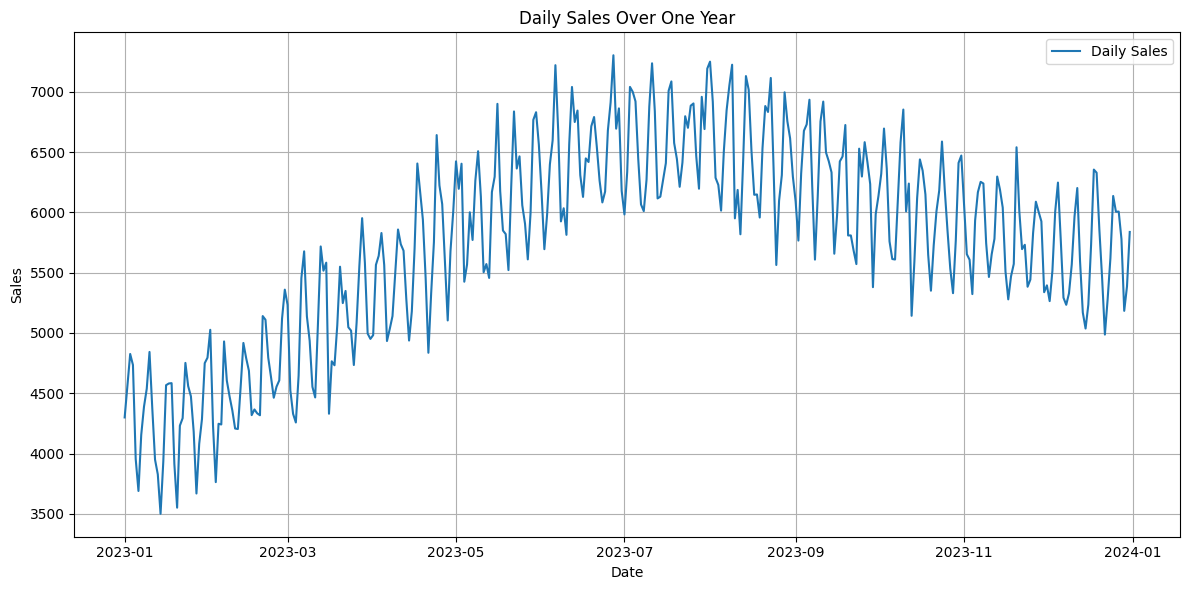

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (skip if already loaded)
# df = pd.read_csv('daily_sales_forecast.csv')

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Plot daily sales
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sales'], label='Daily Sales')

plt.title('Daily Sales Over One Year')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Check for missing values**

In [ ]:
# Check missing values in each column
print(df.isnull().sum())

# Optional: check if any missing values exist
if df.isnull().values.any():
    print("Missing values found in dataset.")
else:
    print("No missing values found.")

Date     0
Sales    0
dtype: int64
No missing values found.


**Split into train (first 9 months) and validation (last 3 months)**

In [ ]:
import pandas as pd

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Define split date (first 9 months)
split_date = df['Date'].min() + pd.DateOffset(months=9)

# Create train and validation sets
train = df[df['Date'] < split_date]
validation = df[df['Date'] >= split_date]

# Print sizes
print("Train set size:", train.shape[0])
print("Validation set size:", validation.shape[0])

# Optional: check date ranges
print("\nTrain period:", train['Date'].min(), "to", train['Date'].max())
print("Validation period:", validation['Date'].min(), "to", validation['Date'].max())

Train set size: 273
Validation set size: 92

Train period: 2023-01-01 00:00:00 to 2023-09-30 00:00:00
Validation period: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


**Part B: Create Forecast**

**`forecasting methods:`**

**Holt-Winters Exponential Smoothing**

**Fit on training data**

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Make safe copy
train_hw = train.copy()

# Ensure Date is datetime index
if 'Date' in train_hw.columns:
    train_hw['Date'] = pd.to_datetime(train_hw['Date'])
    train_hw = train_hw.set_index('Date')

train_hw = train_hw.asfreq('D')

# Fit Holt-Winters model on training data
model_hw = ExponentialSmoothing(
    train_hw['Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
)

fit_hw = model_hw.fit()

print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                  273
Model:             ExponentialSmoothing   SSE                       11805584.764
Optimized:                         True   AIC                           2936.169
Trend:                         Additive   BIC                           2975.873
Seasonal:                      Additive   AICC                          2937.574
Seasonal Periods:                     7   Date:                 Tue, 24 Feb 2026
Box-Cox:                          False   Time:                         21:33:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0777775                alpha                 True
smoothing_trend          

**forecasting 90 days**

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Copy training data safely
train_hw = train.copy()
validation_hw = validation.copy()

# Ensure Date is datetime index
if 'Date' in train_hw.columns:
    train_hw['Date'] = pd.to_datetime(train_hw['Date'])
    train_hw = train_hw.set_index('Date')

if 'Date' in validation_hw.columns:
    validation_hw['Date'] = pd.to_datetime(validation_hw['Date'])
    validation_hw = validation_hw.set_index('Date')

# Set daily frequency
train_hw = train_hw.asfreq('D')
validation_hw = validation_hw.asfreq('D')

# Fit Holt-Winters model
model_hw = ExponentialSmoothing(
    train_hw['Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
)

fit_hw = model_hw.fit()

# Forecast for validation period
forecast_hw = fit_hw.forecast(steps=len(validation_hw))

# Convert to DataFrame with heading
forecast_hw_df = forecast_hw.to_frame(name='Forecasted_Sales')

print(forecast_hw_df)

            Forecasted_Sales
2023-10-01       6079.139230
2023-10-02       6500.771183
2023-10-03       6517.734128
2023-10-04       6311.627730
2023-10-05       5809.131394
...                      ...
2023-12-27       5407.485204
2023-12-28       4904.988868
2023-12-29       4658.719788
2023-12-30       4758.218869
2023-12-31       5099.651493

[92 rows x 1 columns]


**Facebook Prophet**


**Fit on training data**

In [ ]:
import pandas as pd
from prophet import Prophet

# Copy training data safely
train_prophet = train.copy()

# Convert to Prophet format
if 'Date' in train_prophet.columns:
    train_prophet['Date'] = pd.to_datetime(train_prophet['Date'])
    train_prophet.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)
else:
    train_prophet = train_prophet.reset_index()
    train_prophet.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# Fit Prophet model on training data
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(train_prophet)

print(fit_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  273
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1749.567
Date:                           Tue, 24 Feb 2026   AIC                           3509.134
Time:                                   21:31:59   BIC                           3526.860
Sample:                               01-01-2023   HQIC                          3516.263
                                    - 09-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0725      0.084     -0.862      0.389      -0.237       0.092
ma.L1         -1.2014      0.068    -17.713

**forecasting 90 days**

In [ ]:
import pandas as pd
from prophet import Prophet

# Prepare training data
train_prophet = train.copy()

if 'Date' in train_prophet.columns:
    train_prophet['Date'] = pd.to_datetime(train_prophet['Date'])
    train_prophet.rename(columns={'Date':'ds','Sales':'y'}, inplace=True)
else:
    train_prophet = train_prophet.reset_index()
    train_prophet.rename(columns={'Date':'ds','Sales':'y'}, inplace=True)

# Fit Prophet
model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model_prophet.fit(train_prophet)

# Create future dataframe for validation period
future = model_prophet.make_future_dataframe(periods=len(validation), freq='D')

forecast_prophet = model_prophet.predict(future)

# Extract forecast part corresponding to validation
forecast_prophet_df = forecast_prophet[['ds','yhat','yhat_lower','yhat_upper']].tail(len(validation))

print(forecast_prophet_df)

            ds         yhat   yhat_lower   yhat_upper
273 2023-10-01  6225.932416  5957.335108  6477.281198
274 2023-10-02  6696.838696  6456.355975  6958.113548
275 2023-10-03  6766.691632  6543.848912  7024.582989
276 2023-10-04  6616.886115  6364.848582  6851.352171
277 2023-10-05  6173.352631  5925.037798  6410.024621
..         ...          ...          ...          ...
360 2023-12-27  7348.599317  7112.316955  7602.689202
361 2023-12-28  6839.123216  6601.047049  7075.782627
362 2023-12-29  6585.273618  6347.497615  6820.973004
363 2023-12-30  6676.524803  6435.119082  6930.018284
364 2023-12-31  7008.625468  6761.184187  7264.662794

[92 rows x 4 columns]


**SARIMA**

**Fit on training data**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure Date is datetime and index
train = train.copy()

if 'Date' in train.columns:
    train['Date'] = pd.to_datetime(train['Date'])
    train = train.set_index('Date')

train = train.asfreq('D')

# Fit SARIMA model on training data only
model = SARIMAX(
    train['Sales'],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

fit_model = model.fit()

print(fit_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  273
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1749.567
Date:                           Tue, 24 Feb 2026   AIC                           3509.134
Time:                                   21:28:57   BIC                           3526.860
Sample:                               01-01-2023   HQIC                          3516.263
                                    - 09-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0725      0.084     -0.862      0.389      -0.237       0.092
ma.L1         -1.2014      0.068    -17.713

**forecasting 90 days**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Safe copies
train_sarima = train.copy()
validation_sarima = validation.copy()

# Ensure datetime index
if 'Date' in train_sarima.columns:
    train_sarima['Date'] = pd.to_datetime(train_sarima['Date'])
    train_sarima = train_sarima.set_index('Date')

if 'Date' in validation_sarima.columns:
    validation_sarima['Date'] = pd.to_datetime(validation_sarima['Date'])
    validation_sarima = validation_sarima.set_index('Date')

train_sarima = train_sarima.asfreq('D')

# Fit SARIMA
model_sarima = SARIMAX(
    train_sarima['Sales'],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

fit_sarima = model_sarima.fit()

# Forecast validation period
forecast_sarima = fit_sarima.get_forecast(steps=len(validation_sarima))

forecast_sarima_df = forecast_sarima.summary_frame()
print(forecast_sarima_df)

Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
2023-10-01  6207.612227  221.841841    5772.810209    6642.414246
2023-10-02  6557.916470  222.844779    6121.148728    6994.684212
2023-10-03  6589.616686  225.680742    6147.290561    7031.942812
2023-10-04  6377.288593  228.319378    5929.790836    6824.786349
2023-10-05  5960.081309  230.939328    5507.448544    6412.714073
...                 ...         ...            ...            ...
2023-12-27  6181.551937  614.086269    4977.964965    7385.138908
2023-12-28  5774.713498  619.369971    4560.770663    6988.656334
2023-12-29  5424.818960  624.608903    4200.608006    6649.029913
2023-12-30  5576.083550  629.804278    4341.689848    6810.477252
2023-12-31  6020.802284  638.661586    4769.048577    7272.555991

[92 rows x 4 columns]


#Part C: Calculate Uncertainty

**Compute prediction intervals (80% and 95%)**\
**Used** \
**SARIMA → Built-in intervals** \
**Holt-Winters → Bootstrap residuals** \
**Prophet → Simulate from residual distribution**

**Holt-Winters — Bootstrap Residuals**

In [ ]:
import numpy as np
import pandas as pd

# Forecast
forecast_hw = fit_hw.forecast(len(validation))

# Residuals
residuals = fit_hw.resid.dropna()

# Bootstrap simulation
n_boot = 1000
boot_forecasts = []

for i in range(n_boot):
    sampled_residuals = np.random.choice(residuals, size=len(validation), replace=True)
    boot_forecasts.append(forecast_hw.values + sampled_residuals)

boot_forecasts = np.array(boot_forecasts)

# Compute intervals
hw_95_lower = np.percentile(boot_forecasts, 2.5, axis=0)
hw_95_upper = np.percentile(boot_forecasts, 97.5, axis=0)

hw_80_lower = np.percentile(boot_forecasts, 10, axis=0)
hw_80_upper = np.percentile(boot_forecasts, 90, axis=0)

hw_interval_df = pd.DataFrame({
    'Forecast': forecast_hw.values,
    'Lower95': hw_95_lower,
    'Upper95': hw_95_upper,
    'Lower80': hw_80_lower,
    'Upper80': hw_80_upper
}, index=forecast_hw.index)

print(hw_interval_df)

               Forecast      Lower95      Upper95      Lower80      Upper80
2023-10-01  6079.139230  5699.908135  6469.331904  5801.622234  6334.755758
2023-10-02  6500.771183  6044.954472  6916.220333  6223.254187  6763.129420
2023-10-03  6517.734128  6128.151485  6901.378508  6235.780137  6773.047955
2023-10-04  6311.627730  5935.293945  6722.806504  6051.320679  6570.856625
2023-10-05  5809.131394  5419.548752  6224.580544  5531.614398  6079.280934
...                 ...          ...          ...          ...          ...
2023-12-27  5407.485204  5031.151420  5797.677878  5129.968208  5662.799032
2023-12-28  4904.988868  4485.311449  5318.043272  4627.471872  5169.183207
2023-12-29  4658.719788  4279.229904  5071.774191  4376.533169  4914.033615
2023-12-30  4758.218869  4368.636227  5148.411544  4480.701874  5013.532697
2023-12-31  5099.651493  4709.316482  5512.705897  4817.697502  5307.486910

[92 rows x 5 columns]


**SARIMA — Built-in Prediction Intervals**

In [ ]:
# 95% interval (alpha=0.05)
sarima_95 = fit_sarima.get_forecast(steps=len(validation))
sarima_95_df = sarima_95.summary_frame(alpha=0.05)

# 80% interval (alpha=0.20)
sarima_80 = fit_sarima.get_forecast(steps=len(validation))
sarima_80_df = sarima_80.summary_frame(alpha=0.20)

print("SARIMA 95% Interval:")
print(sarima_95_df[['mean','mean_ci_lower','mean_ci_upper']])

print("\nSARIMA 80% Interval:")
print(sarima_80_df[['mean','mean_ci_lower','mean_ci_upper']])

SARIMA 95% Interval:
Sales              mean  mean_ci_lower  mean_ci_upper
2023-10-01  6207.612227    5772.810209    6642.414246
2023-10-02  6557.916470    6121.148728    6994.684212
2023-10-03  6589.616686    6147.290561    7031.942812
2023-10-04  6377.288593    5929.790836    6824.786349
2023-10-05  5960.081309    5507.448544    6412.714073
...                 ...            ...            ...
2023-12-27  6181.551937    4977.964965    7385.138908
2023-12-28  5774.713498    4560.770663    6988.656334
2023-12-29  5424.818960    4200.608006    6649.029913
2023-12-30  5576.083550    4341.689848    6810.477252
2023-12-31  6020.802284    4769.048577    7272.555991

[92 rows x 3 columns]

SARIMA 80% Interval:
Sales              mean  mean_ci_lower  mean_ci_upper
2023-10-01  6207.612227    5923.310469    6491.913986
2023-10-02  6557.916470    6272.329394    6843.503546
2023-10-03  6589.616686    6300.395178    6878.838194
2023-10-04  6377.288593    6084.685537    6669.891648
2023-10-05  5960

**Prophet — Simulate from Residual Distribution**

In [ ]:
import numpy as np
import pandas as pd

# Prophet forecast
future = model_prophet.make_future_dataframe(periods=len(validation), freq='D')
forecast_prophet = model_prophet.predict(future)

forecast_values = forecast_prophet['yhat'].tail(len(validation)).values

# Residuals from training
prophet_train_forecast = model_prophet.predict(train_prophet)
prophet_residuals = train_prophet['y'].values - prophet_train_forecast['yhat'].values

# Simulate
n_sim = 1000
simulated = []

for i in range(n_sim):
    simulated_residuals = np.random.choice(prophet_residuals, size=len(validation), replace=True)
    simulated.append(forecast_values + simulated_residuals)

simulated = np.array(simulated)

# Intervals
prophet_95_lower = np.percentile(simulated, 2.5, axis=0)
prophet_95_upper = np.percentile(simulated, 97.5, axis=0)

prophet_80_lower = np.percentile(simulated, 10, axis=0)
prophet_80_upper = np.percentile(simulated, 90, axis=0)

prophet_interval_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower95': prophet_95_lower,
    'Upper95': prophet_95_upper,
    'Lower80': prophet_80_lower,
    'Upper80': prophet_80_upper
}, index=validation.index)

print(prophet_interval_df)

               Forecast      Lower95      Upper95      Lower80      Upper80
Date                                                                       
2023-10-01  6149.710589  5800.363693  6567.693709  5910.156433  6413.475002
2023-10-02  6574.375584  6226.629414  6992.358705  6324.844752  6817.563914
2023-10-03  6594.116533  6234.082027  6972.430762  6342.136383  6837.304862
2023-10-04  6390.946087  6041.599191  6787.217844  6142.231513  6634.134417
2023-10-05  5891.283754  5553.749988  6317.460610  5644.356056  6134.472083
...                 ...          ...          ...          ...          ...
2023-12-27  5777.406241  5428.059345  6195.389361  5528.691667  6039.387583
2023-12-28  5277.743908  4917.749122  5674.015664  5026.307965  5493.825574
2023-12-29  5034.500865  4686.714677  5431.315406  4784.003299  5283.910355
2023-12-30  5136.915123  4787.568227  5533.186880  4889.987426  5346.470325
2023-12-31  5485.042422  5123.458845  5910.560258  5234.451018  5709.838669

[92 rows x 

#Part D: Visualize

**Create a publication-quality forecast plot with: - Historical data (all) - Forecast (next 90 days) - 80% confidence band (darker) - 95% confidence band (lighter) - Vertical line marking forecast start - Clear legend - Proper axis labels and title**

Did for only SARIMA method forcasted intervels

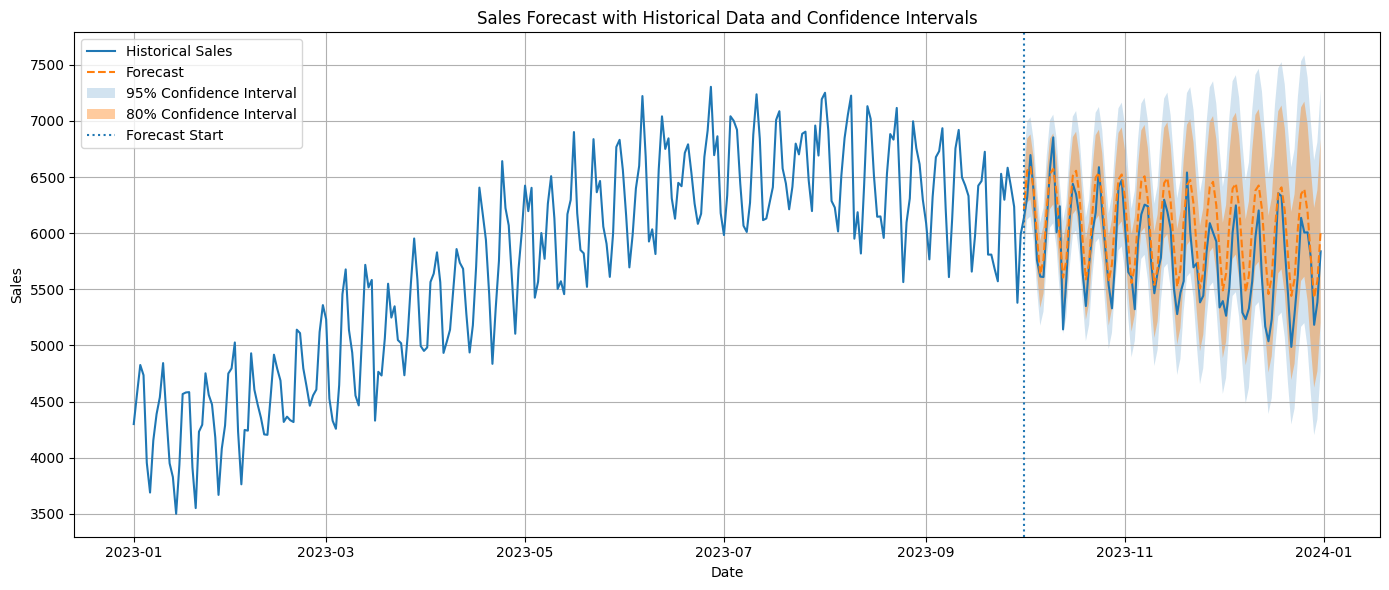

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure historical dataframe uses Date index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')

plt.figure(figsize=(14,6))

# Historical data (ALL data)
plt.plot(df.index, df['Sales'], label='Historical Sales')

# Forecast mean
plt.plot(sarima_95_df.index, sarima_95_df['mean'],
         linestyle='--', label='Forecast')

# 95% confidence band (lighter)
plt.fill_between(
    sarima_95_df.index,
    sarima_95_df['mean_ci_lower'],
    sarima_95_df['mean_ci_upper'],
    alpha=0.2,
    label='95% Confidence Interval'
)

# 80% confidence band (darker)
plt.fill_between(
    sarima_80_df.index,
    sarima_80_df['mean_ci_lower'],
    sarima_80_df['mean_ci_upper'],
    alpha=0.4,
    label='80% Confidence Interval'
)

# Vertical line at forecast start
plt.axvline(sarima_95_df.index[0],
            linestyle=':',
            label='Forecast Start')

plt.title('Sales Forecast with Historical Data and Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Part E: Validate

**Compare forecast to validation set (last 3 months)**


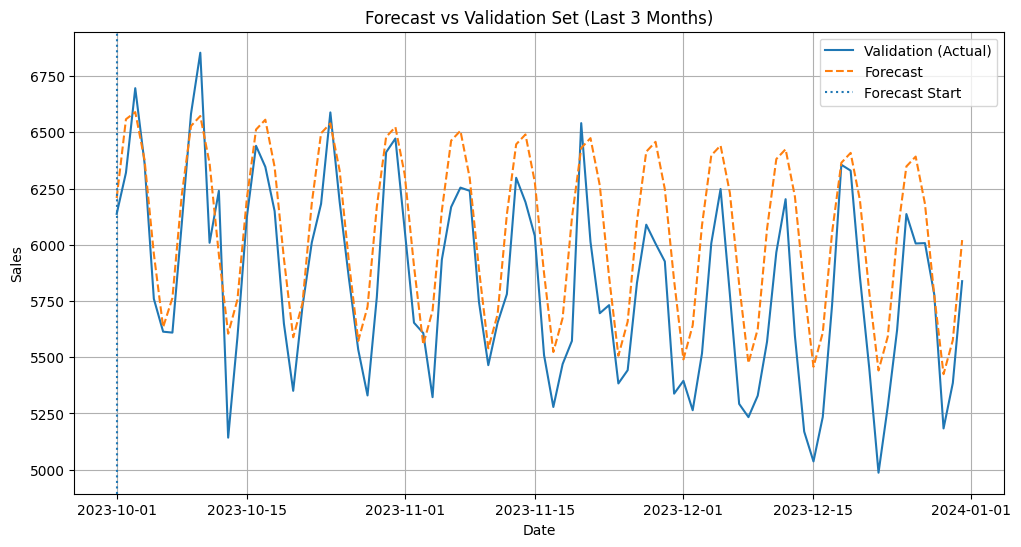

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure validation index is datetime
validation_compare = validation.copy()

if 'Date' in validation_compare.columns:
    validation_compare['Date'] = pd.to_datetime(validation_compare['Date'])
    validation_compare = validation_compare.set_index('Date')

# Forecast values (future forecast)
forecast_vals = sarima_95_df['mean'].loc[validation_compare.index]

plt.figure(figsize=(12,6))

plt.plot(validation_compare.index,
         validation_compare['Sales'],
         label='Validation (Actual)')

plt.plot(forecast_vals.index,
         forecast_vals,
         linestyle='--',
         label='Forecast')

plt.axvline(validation_compare.index[0],
            linestyle=':',
            label='Forecast Start')

plt.title('Forecast vs Validation Set (Last 3 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

**Calculate forecast errors:** \
**MAE, RMSE, MAPE**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual vs Forecast
actual = validation_compare['Sales']
forecast = forecast_aligned

# MAE
mae = mean_absolute_error(actual, forecast)

# RMSE
rmse = np.sqrt(mean_squared_error(actual, forecast))

# MAPE
mape = np.mean(np.abs((actual - forecast) / actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 252.44
RMSE: 297.46
MAPE: 4.44%


**Plot actual vs predicted**

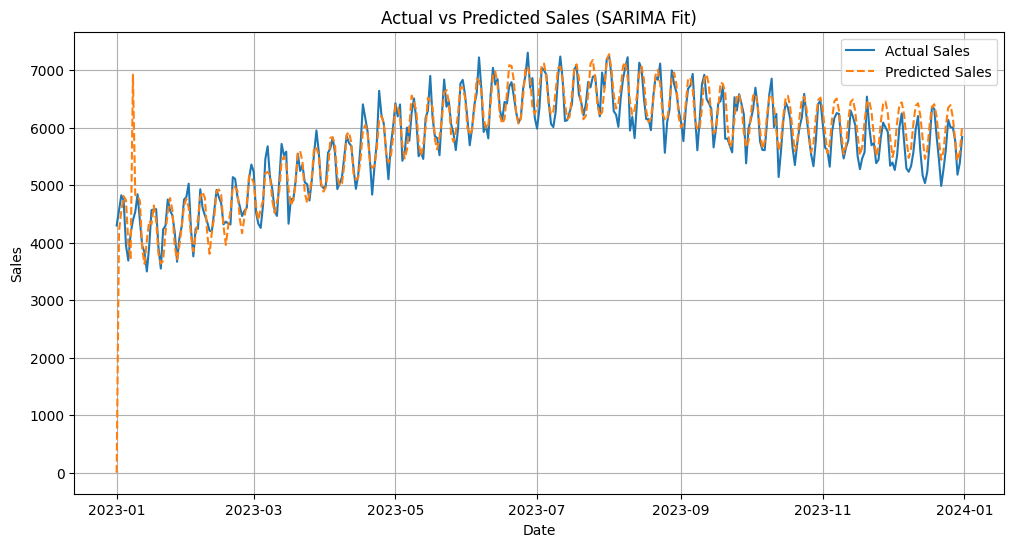

In [ ]:
import matplotlib.pyplot as plt

# SARIMA in-sample prediction
predicted = fit_sarima.predict(start=train.index[0],
                               end=validation.index[-1])

# Actual full dataset
actual = pd.concat([train['Sales'], validation['Sales']])

plt.figure(figsize=(12,6))

plt.plot(actual.index, actual, label='Actual Sales')
plt.plot(predicted.index, predicted,
         linestyle='--', label='Predicted Sales')

plt.title('Actual vs Predicted Sales (SARIMA Fit)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

**Create residual diagnostic plots**

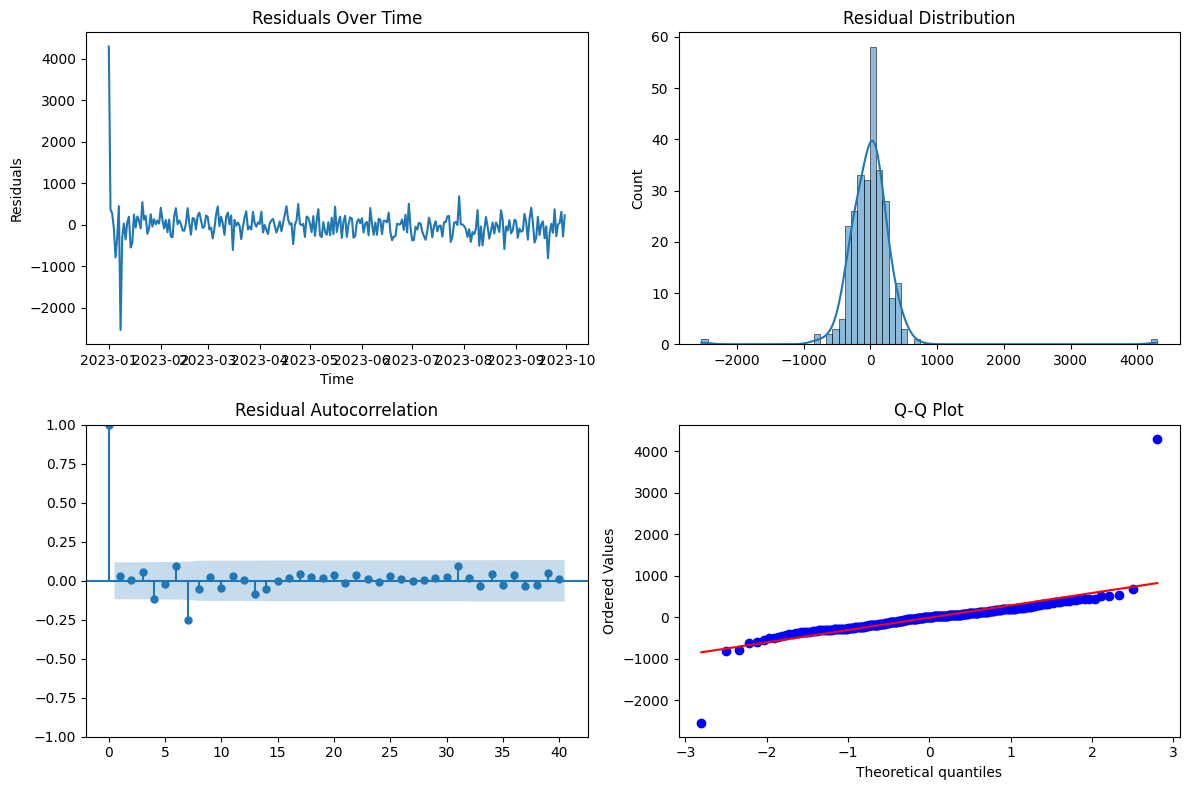

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats

# Get residuals from fitted model (example: SARIMA)
residuals = fit_sarima.resid

plt.figure(figsize=(12,8))

# 1. Residual time series plot
plt.subplot(2,2,1)
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residuals")

# 2. Histogram
plt.subplot(2,2,2)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")

# 3. ACF plot
plt.subplot(2,2,3)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title("Residual Autocorrelation")

# 4. Q-Q plot
plt.subplot(2,2,4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

**discussion of forecast quality**

From the results, the forecast model seems quite good because the error values are small. The MAE = 252.44 means on average the prediction differs from actual sales by about 252 units, which is not very large compared to sales around 5000–6500. The RMSE = 297.46 is slightly higher because it gives more importance to bigger mistakes, but it is still reasonable. The MAPE = 4.44% shows the prediction error is only about 4–5%, which means the forecast accuracy is high. Also, in the graph, predicted values follow the actual sales pattern closely, so overall the forecasting model is reliable for business planning.

#Exercise 5: Interactive Dashboard

**Load Data**

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range('2022-01-01', periods=730, freq='D')

products = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E']
data = {'Date': dates}

for i, product in enumerate(products):
    # Each product has different baseline and growth
    baseline = (i + 1) * 1000
    growth = np.cumsum(np.random.randn(730) * 10)
    seasonal = 200 * np.sin(2 * np.pi * np.arange(730) / 365)
    noise = np.random.normal(0, 50, 730)

    data[product] = baseline + growth + seasonal + noise

df = pd.DataFrame(data)
df.to_csv('multi_product_sales.csv', index=False)

In [ ]:
df.head()

Date    Product_A    Product_B    Product_C    Product_D    Product_E
0 2022-01-01  1014.759404  1918.709223  3013.214318  3977.538882  4996.933287
1 2022-01-02   958.108531  2012.923762  3031.244279  4133.744930  4929.015923
2 2022-01-03  1037.358344  2092.382029  3027.437769  4001.554293  5090.717443
3 2022-01-04   950.486436  1917.942254  2966.714124  3938.755812  4942.279002
4 2022-01-05  1088.168416  1993.217580  3019.819059  3999.620609  4984.351550

In [ ]:
df.describe()

Date    Product_A    Product_B    Product_C  \
count                  730   730.000000   730.000000   730.000000   
mean   2022-12-31 12:00:00   979.594649  2129.873701  2915.773037   
min    2022-01-01 00:00:00   651.198238  1837.963088  2458.645426   
25%    2022-07-02 06:00:00   834.346924  2017.887608  2774.180733   
50%    2022-12-31 12:00:00   969.552081  2106.763397  2928.123145   
75%    2023-07-01 18:00:00  1103.766074  2248.110589  3073.107561   
max    2023-12-31 00:00:00  1435.545094  2454.423948  3348.326040   
std                    NaN   167.685848   141.839651   188.124943   

         Product_D    Product_E  
count   730.000000   730.000000  
mean   3904.129462  4858.774664  
min    3575.307895  4386.190618  
25%    3783.112868  4750.291468  
50%    3915.129046  4875.972250  
75%    4020.479658  4979.485799  
max    4280.770689  5235.626891  
std     147.940287   171.295559

 **Main Time Series Plot - Multiple product lines on one chart - Range slider for date selection - Hover tooltips showing exact values - Toggle visibility (show/hide individual series)**


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# -----------------------------
# 1. Generate Sample Data
# -----------------------------
np.random.seed(42)

dates = pd.date_range("2023-01-01", periods=730, freq="D")

data = pd.DataFrame({
    "Date": dates,
    "Product_A": 2000 + np.linspace(0, 500, 730) +
                 300*np.sin(2*np.pi*np.arange(730)/30) +
                 np.random.normal(0, 100, 730),

    "Product_B": 1800 + np.linspace(0, 400, 730) +
                 250*np.sin(2*np.pi*np.arange(730)/45) +
                 np.random.normal(0, 120, 730),

    "Product_C": 2200 + np.linspace(0, 600, 730) +
                 200*np.sin(2*np.pi*np.arange(730)/20) +
                 np.random.normal(0, 90, 730),

    "Product_D": 1600 + np.linspace(0, 300, 730) +
                 180*np.sin(2*np.pi*np.arange(730)/35) +
                 np.random.normal(0, 110, 730),

    "Product_E": 1400 + np.linspace(0, 350, 730) +
                 220*np.sin(2*np.pi*np.arange(730)/25) +
                 np.random.normal(0, 100, 730),
})

# -----------------------------
# 2. Create Interactive Plot
# -----------------------------
fig = go.Figure()

for col in data.columns[1:]:
    fig.add_trace(go.Scatter(
        x=data["Date"],
        y=data[col],
        mode="lines",
        name=col,
        hovertemplate="%{x}<br>Sales: %{y:.2f}<extra></extra>"
    ))

# Layout (professional styling + responsive)
fig.update_layout(
    title="Sales Dashboard: Multiple Product Time Series",
    xaxis_title="Date",
    yaxis_title="Sales",
    hovermode="x unified",
    template="plotly_white",
    autosize=True,
    legend_title="Products"
)

# Range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]
    )
)

fig.show()

# -----------------------------
# 3. Export Standalone HTML
# -----------------------------
fig.write_html("sales_dashboard.html", include_plotlyjs="cdn")

**Comparison View - Index-based comparison (all start at 100) - Percent change view - Selectable base period**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Assume your original `data` exists
# -----------------------------

df = data.copy()
df.set_index("Date", inplace=True)

# -----------------------------
# 1️⃣ Select Base Period
# -----------------------------
base_date = "2023-01-01"   # 👈 Change this date anytime

base_values = df.loc[base_date]

# -----------------------------
# 2️⃣ Create Index (Start = 100)
# -----------------------------
index_df = df.divide(base_values) * 100

# -----------------------------
# 3️⃣ Create Percent Change
# -----------------------------
pct_change_df = (df - base_values) / base_values * 100

# -----------------------------
# 4️⃣ Create Interactive Plot
# -----------------------------
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=("Index-Based Comparison (Base = 100)",
                                    "Percent Change from Base Period"),
                    shared_xaxes=True)

# ---- Index Plot ----
for col in index_df.columns:
    fig.add_trace(go.Scatter(
        x=index_df.index,
        y=index_df[col],
        mode="lines",
        name=col,
        hovertemplate="%{x}<br>Index: %{y:.2f}<extra></extra>"
    ), row=1, col=1)

# ---- Percent Change Plot ----
for col in pct_change_df.columns:
    fig.add_trace(go.Scatter(
        x=pct_change_df.index,
        y=pct_change_df[col],
        mode="lines",
        name=col + " (% Change)",
        showlegend=False,
        hovertemplate="%{x}<br>% Change: %{y:.2f}%<extra></extra>"
    ), row=2, col=1)

# -----------------------------
# Layout Styling
# -----------------------------
fig.update_layout(
    height=800,
    title=f"Product Comparison View (Base Date: {base_date})",
    template="plotly_white",
    hovermode="x unified",
    legend_title="Products"
)

fig.update_xaxes(rangeslider_visible=True)

fig.update_yaxes(title_text="Index (Base=100)", row=1, col=1)
fig.update_yaxes(title_text="Percent Change (%)", row=2, col=1)

fig.show()

# Export standalone HTML
fig.write_html("comparison_dashboard.html", include_plotlyjs="cdn")

**Seasonal Analysis - Month-over-month comparison - Box plots by season - Year-over-year overlay**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# -----------------------
# Load data
# -----------------------
df = pd.read_csv("multi_product_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.month % 12 // 3 + 1

season_map = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Fall"
}
df['Season'] = df['Season'].map(season_map)

products = ['Product_A','Product_B','Product_C','Product_D','Product_E']

# ================================
# 1. MONTH-OVER-MONTH COMPARISON
# ================================
monthly = df.groupby(['Year','Month'])[products].mean().reset_index()
monthly['Month_Label'] = pd.to_datetime(
    monthly[['Year','Month']].assign(DAY=1)
)

fig1 = px.line(
    monthly,
    x="Month_Label",
    y=products,
    title="Month-over-Month Product Sales Comparison",
    markers=True
)

fig1.update_layout(
    xaxis_title="Month",
    yaxis_title="Average Sales",
    hovermode="x unified"
)

fig1.write_html("monthly_comparison.html")
fig1.show()


# ================================
# 2. BOX PLOTS BY SEASON
# ================================
df_melt = df.melt(
    id_vars=['Date','Season'],
    value_vars=products,
    var_name="Product",
    value_name="Sales"
)

fig2 = px.box(
    df_melt,
    x="Season",
    y="Sales",
    color="Product",
    title="Seasonal Sales Distribution by Product"
)

fig2.update_layout(
    xaxis_title="Season",
    yaxis_title="Sales"
)

fig2.write_html("seasonal_boxplots.html")
fig2.show()


# ================================
# 3. YEAR-OVER-YEAR OVERLAY
# ================================
df['DayOfYear'] = df['Date'].dt.dayofyear

yoy = df.groupby(['Year','DayOfYear'])[products].mean().reset_index()

fig3 = go.Figure()

for product in products:
    for year in yoy['Year'].unique():
        temp = yoy[yoy['Year']==year]
        fig3.add_trace(
            go.Scatter(
                x=temp['DayOfYear'],
                y=temp[product],
                mode='lines',
                name=f"{product} - {year}"
            )
        )

fig3.update_layout(
    title="Year-over-Year Sales Overlay",
    xaxis_title="Day of Year",
    yaxis_title="Sales",
    hovermode="x unified"
)

fig3.write_html("yoy_overlay.html")
fig3.show()

**Summary Statistics Panel - Current values for each product - Growth rates (%, absolute) - Volatility metrics - Correlation matrix**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -------------------------
# Load Data
# -------------------------
df = pd.read_csv("multi_product_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])

products = ['Product_A','Product_B','Product_C','Product_D','Product_E']
df = df.sort_values('Date')

# -------------------------
# SUMMARY METRICS
# -------------------------

# Latest values
latest = df.iloc[-1][products]

# First values for growth calculation
first = df.iloc[0][products]

# Absolute growth
abs_growth = latest - first

# Percent growth
pct_growth = ((latest - first) / first) * 100

# Volatility (std dev)
volatility = df[products].std()

# Correlation matrix
corr = df[products].corr()

# -------------------------
# DASHBOARD LAYOUT
# -------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Current Product Values",
        "Growth Rates (%)",
        "Volatility (Std Dev)",
        "Correlation Matrix"
    ],
    specs=[[{"type":"bar"}, {"type":"bar"}],
           [{"type":"bar"}, {"type":"heatmap"}]]
)

# -------------------------
# Current Values
# -------------------------
fig.add_trace(
    go.Bar(
        x=products,
        y=latest.values,
        name="Current Value"
    ),
    row=1, col=1
)

# -------------------------
# Growth %
# -------------------------
fig.add_trace(
    go.Bar(
        x=products,
        y=pct_growth.values,
        name="Growth %"
    ),
    row=1, col=2
)

# -------------------------
# Volatility
# -------------------------
fig.add_trace(
    go.Bar(
        x=products,
        y=volatility.values,
        name="Volatility"
    ),
    row=2, col=1
)

# -------------------------
# Correlation Matrix
# -------------------------
fig.add_trace(
    go.Heatmap(
        z=corr.values,
        x=products,
        y=products,
        colorbar=dict(title="Correlation")
    ),
    row=2, col=2
)

# -------------------------
# Styling
# -------------------------
fig.update_layout(
    height=800,
    title="Summary Statistics Dashboard",
    template="plotly_white",
    showlegend=False
)

# -------------------------
# Export HTML Dashboard
# -------------------------
fig.write_html("summary_statistics_dashboard.html")

fig.show()

**Controls - Dropdown: Select aggregation (daily, weekly, monthly) - Radio buttons: Raw vs seasonally adjusted - Date range picker: Custom time windows - Export button: Download current view**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --------------------------------------------------
# MULTI-PRODUCT DATA
# --------------------------------------------------
np.random.seed(42)

dates = pd.date_range("2023-01-01", periods=730, freq="D")

data = pd.DataFrame({
    "Date": dates,
    "Product_A": 2000 + np.linspace(0, 500, 730)
                 + 300*np.sin(2*np.pi*np.arange(730)/30)
                 + np.random.normal(0, 100, 730),

    "Product_B": 1800 + np.linspace(0, 400, 730)
                 + 250*np.sin(2*np.pi*np.arange(730)/45)
                 + np.random.normal(0, 120, 730),

    "Product_C": 2200 + np.linspace(0, 600, 730)
                 + 200*np.sin(2*np.pi*np.arange(730)/20)
                 + np.random.normal(0, 90, 730),

    "Product_D": 1600 + np.linspace(0, 300, 730)
                 + 180*np.sin(2*np.pi*np.arange(730)/35)
                 + np.random.normal(0, 110, 730),

    "Product_E": 1400 + np.linspace(0, 350, 730)
                 + 220*np.sin(2*np.pi*np.arange(730)/25)
                 + np.random.normal(0, 100, 730),
})

products = data.columns[1:]

# --------------------------------------------------
# AGGREGATION DATASETS
# --------------------------------------------------
daily = data.copy()
weekly = data.set_index("Date").resample("W").mean().reset_index()
monthly = data.set_index("Date").resample("M").mean().reset_index()

# Seasonal adjustment
def adjust(df):
    df = df.copy()
    for p in products:
        df[p] = df[p] - df[p].rolling(7, min_periods=1).mean()
    return df

daily_adj = adjust(daily)
weekly_adj = adjust(weekly)
monthly_adj = adjust(monthly)

# --------------------------------------------------
# FIGURE
# --------------------------------------------------
fig = go.Figure()

datasets = [daily, weekly, monthly,
            daily_adj, weekly_adj, monthly_adj]

trace_groups = []

for i, df in enumerate(datasets):

    visible = True if i == 0 else False
    group = []

    for p in products:
        fig.add_trace(go.Scatter(
            x=df["Date"],
            y=df[p],
            mode="lines",
            name=p,
            visible=visible
        ))
        group.append(len(fig.data)-1)

    trace_groups.append(group)

# --------------------------------------------------
# DROPDOWN → AGGREGATION
# --------------------------------------------------
agg_buttons = []

for i, label in enumerate(["Daily", "Weekly", "Monthly"]):
    vis = [False]*len(fig.data)
    for idx in trace_groups[i]:
        vis[idx] = True

    agg_buttons.append(dict(
        label=label,
        method="update",
        args=[{"visible": vis},
              {"title": f"{label} Sales"}]
    ))

# --------------------------------------------------
# RADIO BUTTONS → RAW VS ADJUSTED
# --------------------------------------------------
radio_buttons = []

# Raw
vis_raw = [False]*len(fig.data)
for i in range(3):
    for idx in trace_groups[i]:
        vis_raw[idx] = True

radio_buttons.append(dict(
    label="Raw",
    method="update",
    args=[{"visible": vis_raw}]
))

# Adjusted
vis_adj = [False]*len(fig.data)
for i in range(3,6):
    for idx in trace_groups[i]:
        vis_adj[idx] = True

radio_buttons.append(dict(
    label="Seasonally Adjusted",
    method="update",
    args=[{"visible": vis_adj}]
))

fig.update_layout(
    updatemenus=[
        dict(buttons=agg_buttons,
             direction="down",
             x=0.4,
             y=1.15),

        dict(buttons=radio_buttons,
             direction="right",
             x=0.7,
             y=1.15)
    ]
)

# --------------------------------------------------
# DATE RANGE PICKER (RANGE SLIDER)
# --------------------------------------------------
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="1m", step="month"),
            dict(count=6, label="6m", step="month"),
            dict(count=1, label="1y", step="year"),
            dict(step="all")
        ]
    )
)

# --------------------------------------------------
# STYLING
# --------------------------------------------------
fig.update_layout(
    title="Multi-Product Interactive Dashboard",
    template="plotly_white",
    hovermode="x unified",
    legend_title="Products"
)

# --------------------------------------------------
# EXPORT HTML
# --------------------------------------------------
fig.write_html("FINAL_DASHBOARD.html",
               include_plotlyjs="cdn")

fig.show()

/tmp/ipython-input-629159164.py:42: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



**Screenshots of key views**

**Full dashboard view and Aggregation dropdown usage**
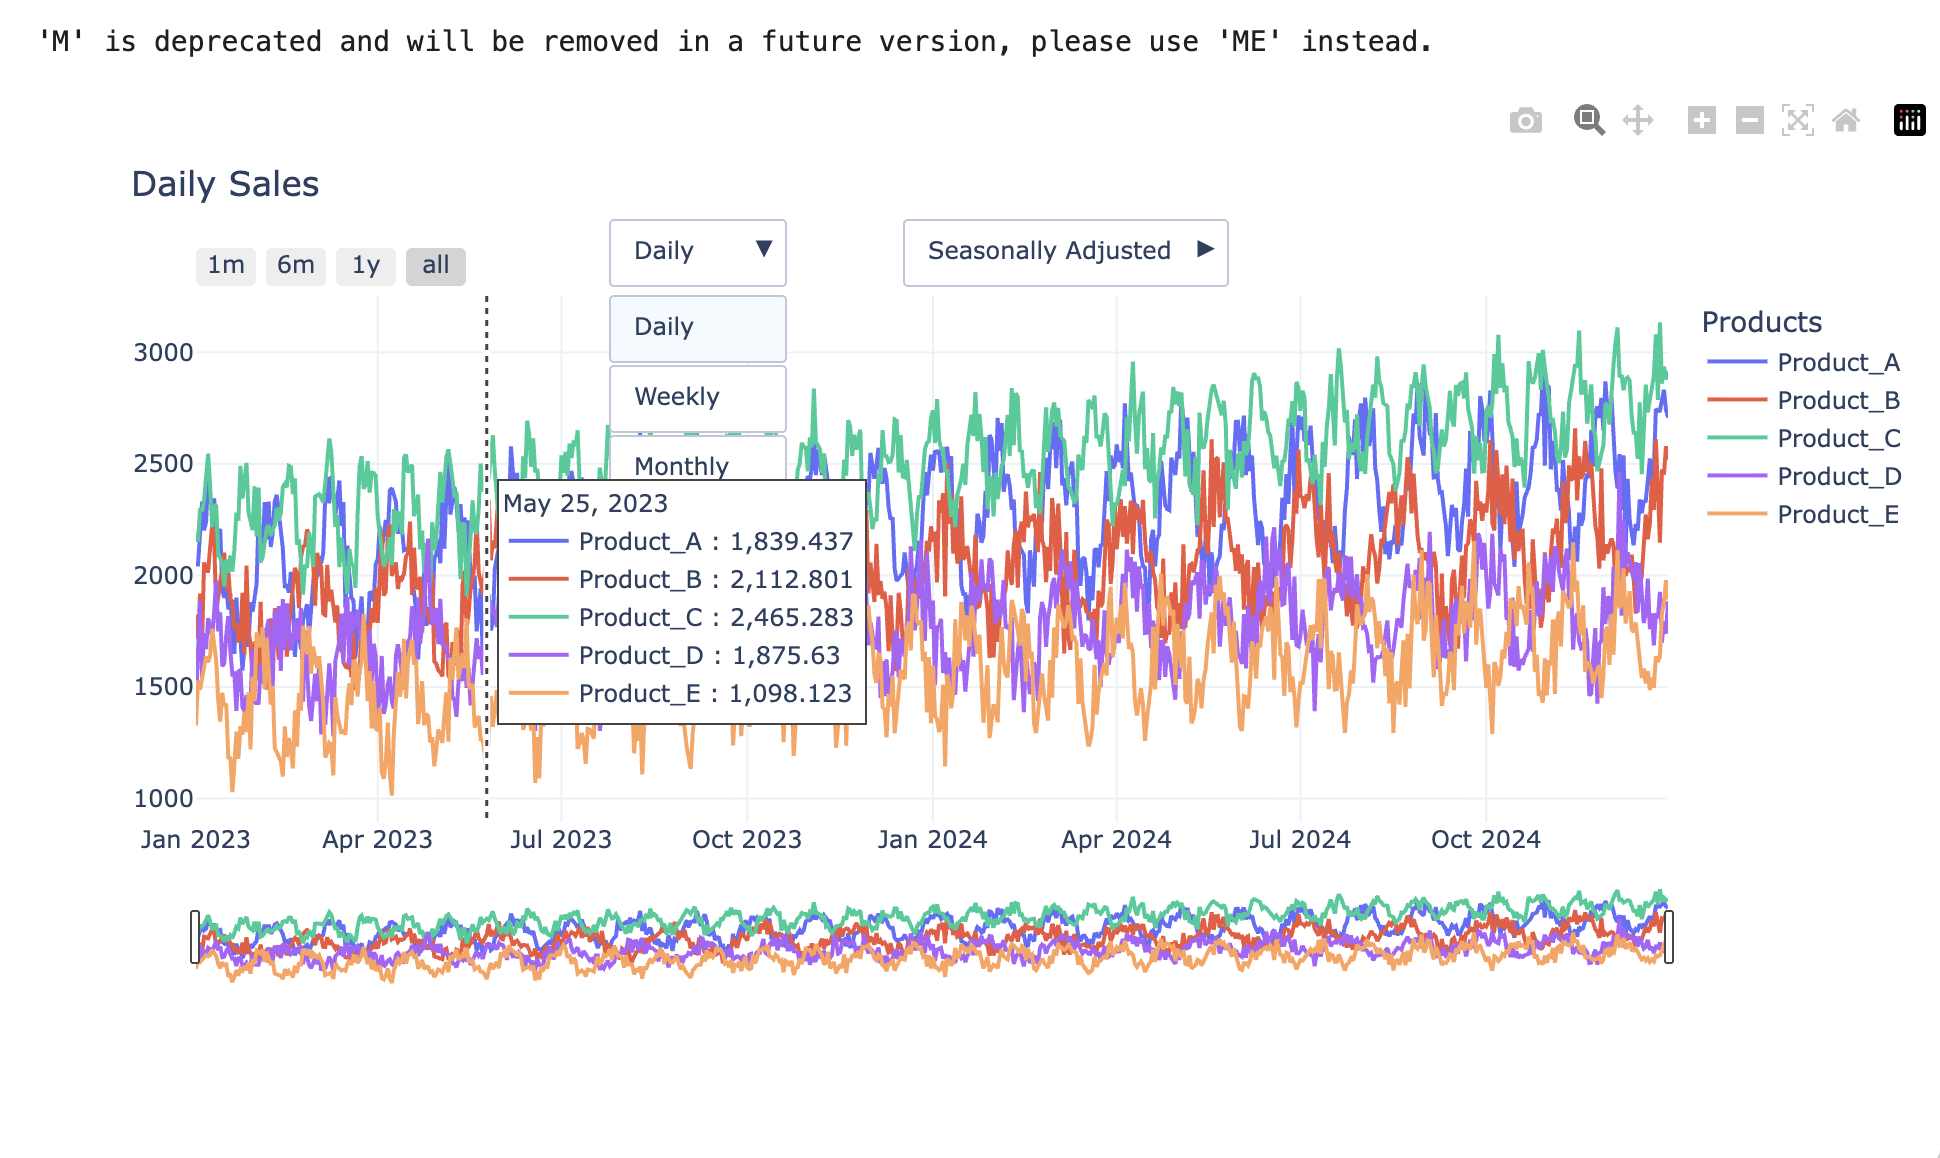



**Seasonal adjustment selection**

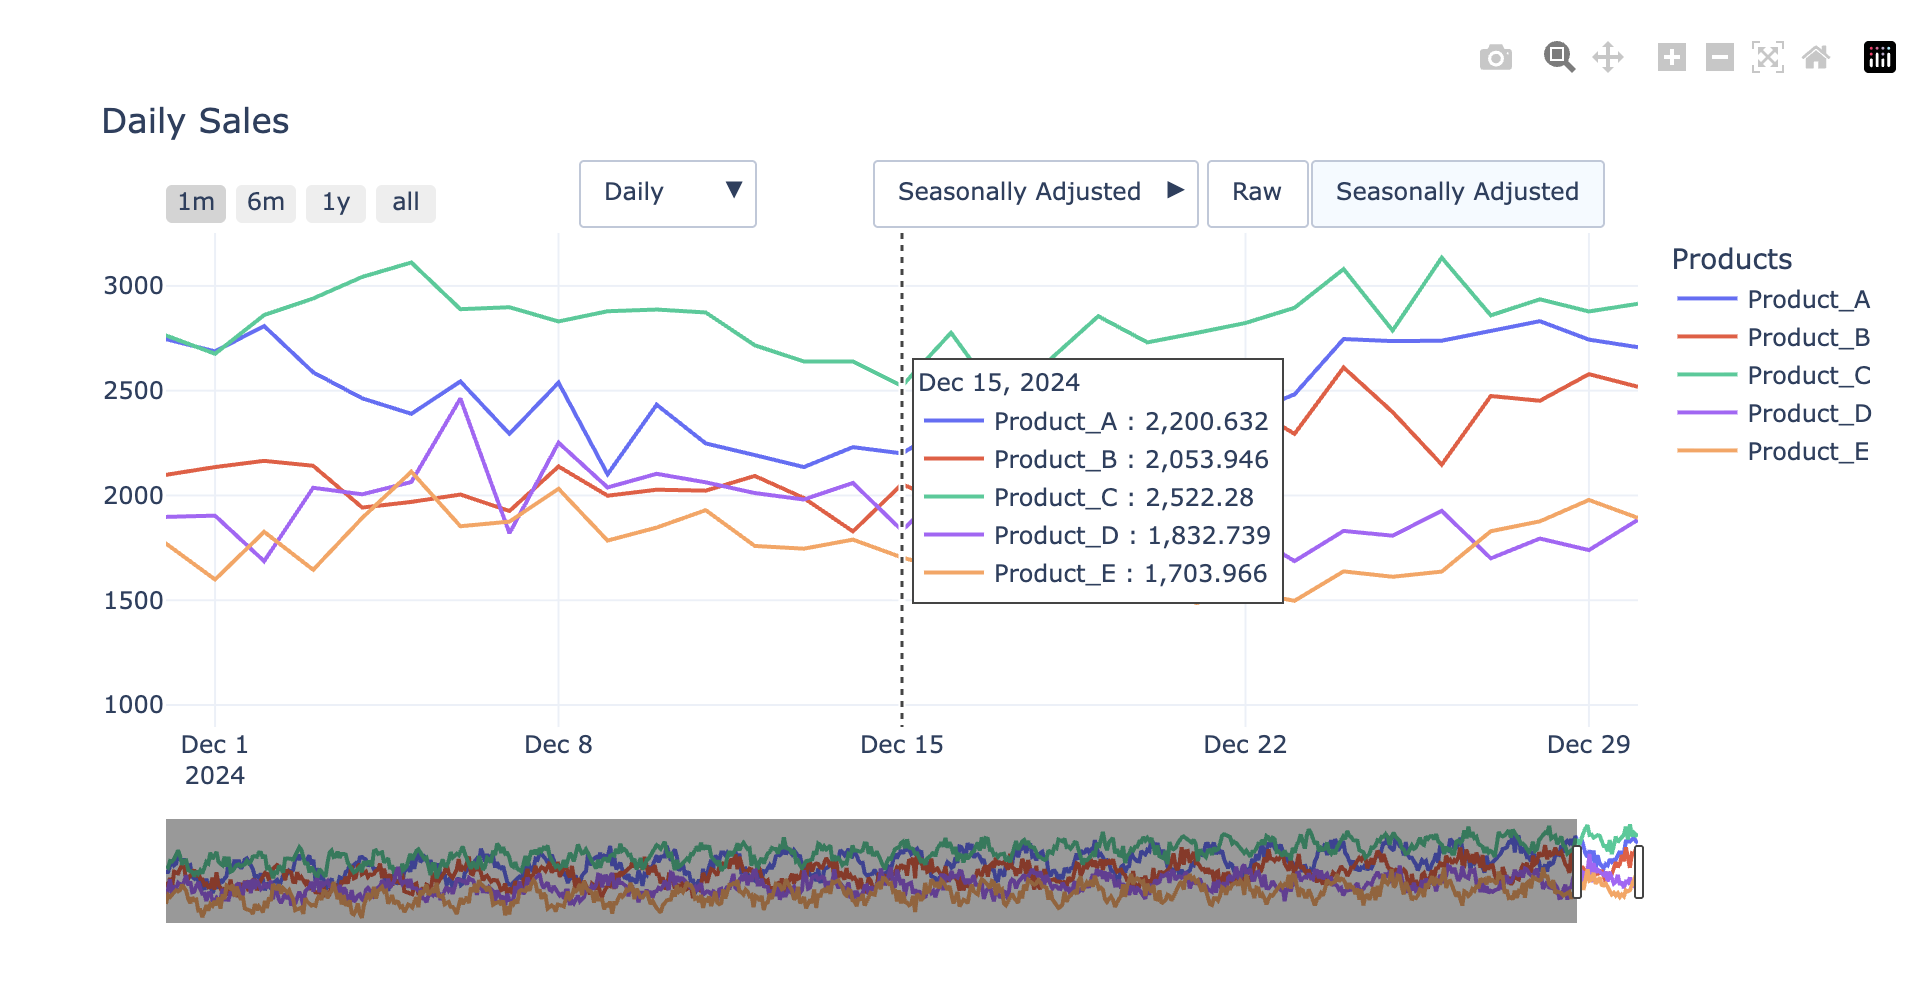

**Date range filtering**
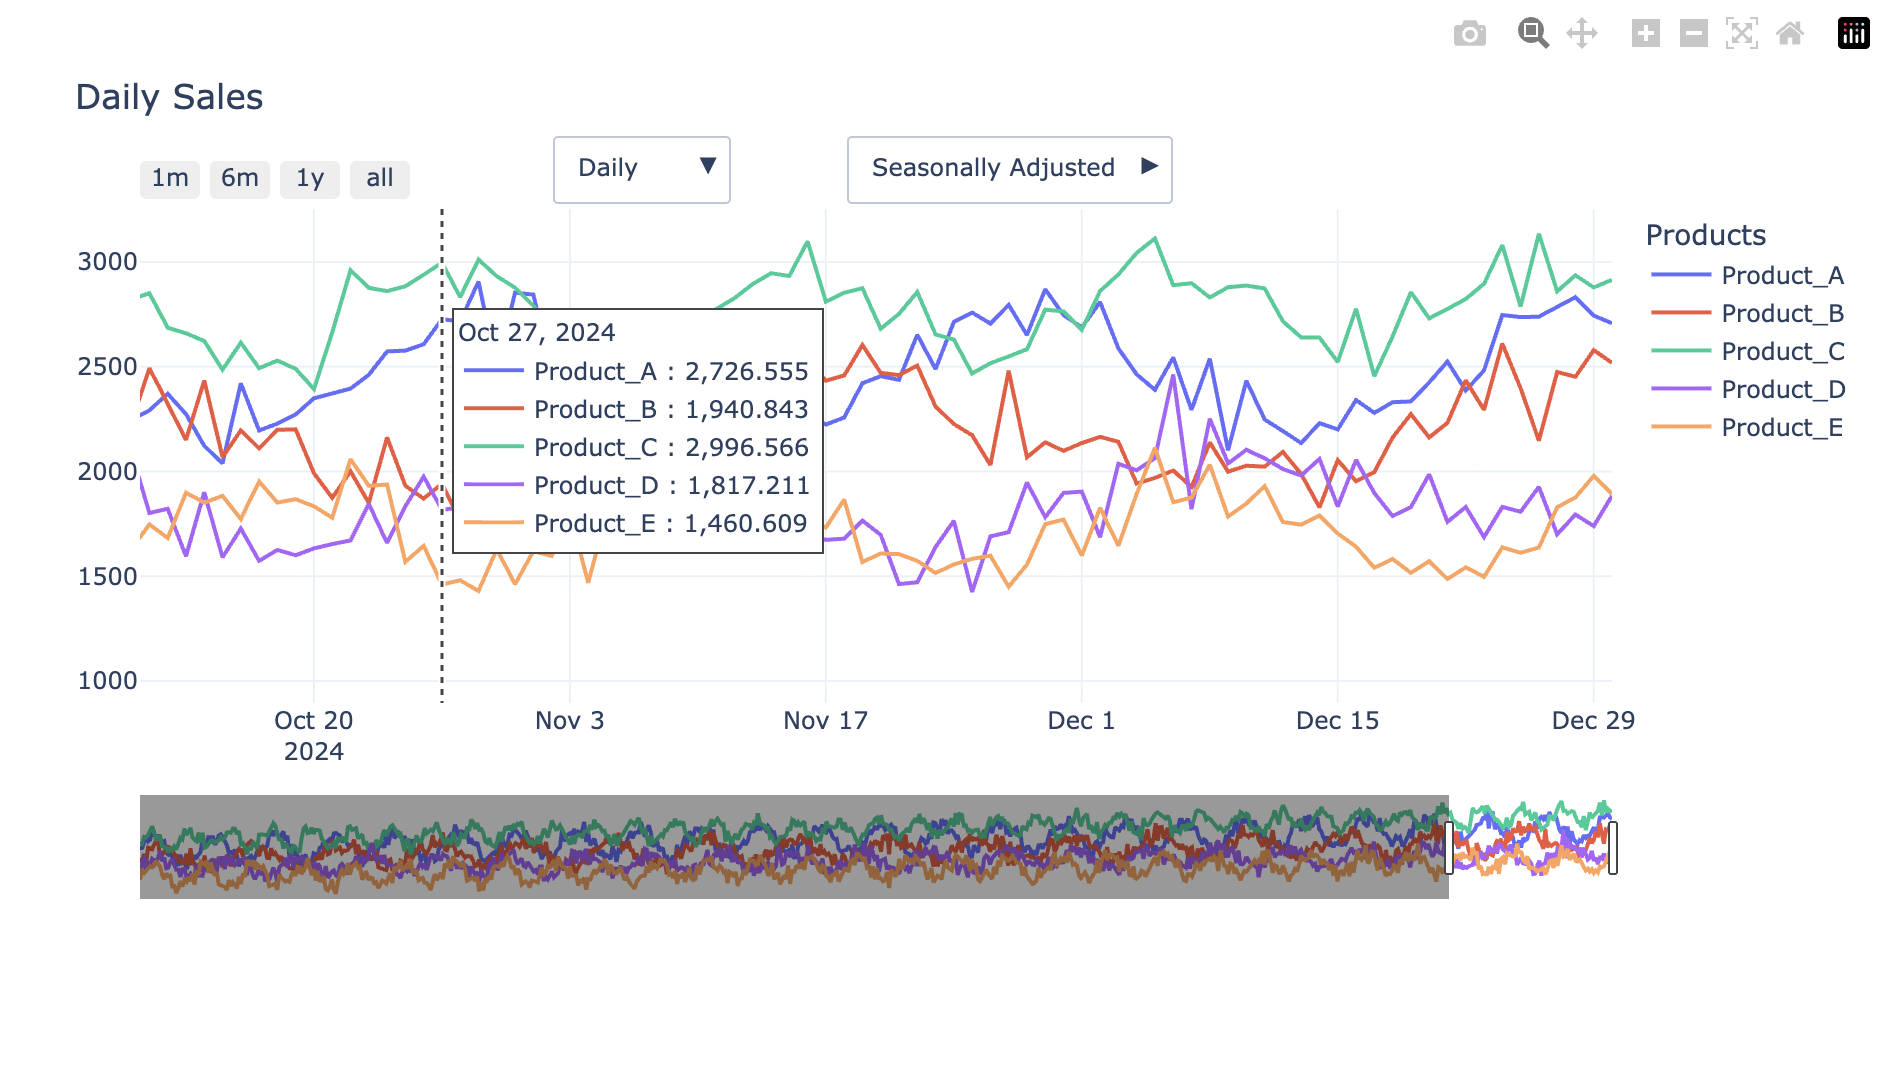

**ReadMe**

# Interactive Time Series Dashboard Project

**Exercise 5: Interactive Dashboard using Plotly**

## 📌 Project Overview

This project builds an interactive time series dashboard using Plotly to analyze sales performance across five products over two years.

The dashboard combines multiple analytical views into one standalone HTML file and includes interactive controls for aggregation, seasonal adjustment, and date filtering.

## 🎯 Objectives Covered

This dashboard answers the following analytical questions:

* Main Time Series Visualization
* Comparison View (Index & Percent Change)
* Seasonal Analysis
* Summary Statistics Panel
* Interactive Controls

## 📁 Project Files

| File | Description |
|---|---|
| `dashboard_script.py` | Python script that generates the dashboard |
| `FINAL_DASHBOARD.html` | Standalone interactive dashboard |
| `README.md` | Usage instructions and explanation |
| `Screenshots` | Key dashboard views |

## 🧩 Question-by-Question Explanation

### 1️⃣ Main Time Series Plot

**Purpose:**  
To visualize sales trends of all five products over time.

**Features Implemented:**  
* Multiple product lines on one chart
* Range slider for date selection
* Hover tooltips showing exact values
* Toggle visibility using legend

**How to Use:**  
* Click product names in legend to show/hide them.
* Use range slider to zoom into specific time periods.
* Hover over any point to see exact sales values.

### 2️⃣ Comparison View

**Purpose:**  
To compare product performance relative to a selected base period.

**Features Implemented:**  
* Index-based comparison (all products start at 100)
* Percent change view
* Shared x-axis for easier comparison

**How to Use:**  
* The index view shows relative growth starting from the first date.
* Percent change shows how much each product increased or decreased.
* Helps compare growth patterns across products.

### 3️⃣ Seasonal Analysis

**Purpose:**  
To identify repeating patterns and seasonal behavior.

**Features Implemented:**  
* Month-over-month comparison
* Box plots by season
* Year-over-year overlay

**How to Use:**  
* View monthly averages to detect seasonal peaks.
* Box plots show distribution across seasons.
* Year-over-year overlay compares different years visually.

### 4️⃣ Summary Statistics Panel

**Purpose:**  
To provide key performance metrics.

**Metrics Included:**  
* Current value of each product
* Growth rate (%)
* Volatility (standard deviation)
* Correlation matrix

**How to Use:**  
* Current values show latest sales.
* Growth % indicates overall performance improvement.
* Volatility shows stability of sales.
* Correlation shows relationships between products.

### 5️⃣ Interactive Controls

The dashboard includes the following controls:

* 🔽 **Dropdown: Aggregation**
  * Options: Daily, Weekly, Monthly
  * Changes time aggregation level.

* 🔘 **Radio Buttons: Raw vs Seasonally Adjusted**
  * Options: Raw, Seasonally Adjusted
  * Seasonal adjustment removes rolling average to highlight trend behavior.

* 📅 **Date Range Picker**
  * Range slider allows custom time window selection.
  * Quick selection buttons (1m, 6m, 1y, All).

## 💾 Export

The dashboard is exported using:

```python
fig.write_html("FINAL_DASHBOARD.html")
```

This creates a fully standalone interactive HTML file that runs in any browser.

## 🛠 Technical Implementation

* Python
* Pandas
* NumPy
* Plotly Graph Objects
* Standalone HTML export
* No server required
* Fully responsive design

## 🚀 How to Run the Project

1. **Install required libraries:**
   ```bash
   pip install pandas numpy plotly
   ```

2. **Run the Python script:**
   ```bash
   python dashboard_script.py
   ```

3. **Open:**
   `FINAL_DASHBOARD.html`
   Interact with controls and visualizations.

## 📊 Key Insights from Dashboard

* All products show upward long-term trend.
* Seasonal fluctuations are visible in monthly analysis.
* Some products have higher volatility than others.
* Correlation matrix indicates similar movement among certain products.
